# Market Segmentation in Insurance

## 1. Problem

This dataset is meant to be used to group customers based on their purchase behaviors.

## 2. Data understanding

This dataset summarizes the usage behavior of about 9000 active credit cardholders during the last 6 months.

Features:

* Cust ID
* Balance
* Balance Frequency
* Purchases
* One-off Purchases
* Installment Purchases
* Cash Advance
* Purchases Frequency
* One-off Purchases Frequency
* Purchases Installments Frequency
* Cash Advance Frequency
* Cash Advance TRX
* Purchases TRX
* Credit Limit
* Payments
* Minimum Payments
* PRC Full payment
* Tenure

**Link**: https://www.kaggle.com/datasets/jillanisofttech/market-segmentation-in-insurance-unsupervised/data

## 3. Data exploration

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
plt.style.use("ggplot")

In [3]:
PATH_DATA = os.path.join(os.getenv("PATH_DATA_PROJECTS"), "Tabular", "market_segmentation_insurance")

### 3.1. Data profiling

In [4]:
df = pd.read_csv(os.path.join(PATH_DATA, "Customer Data.csv"))
print("Shape:", df.shape)
df.head()

Shape: (8950, 18)


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


#### 3.1.1. Identify missing values

In [5]:
print("Total missing values by columns:")
df.isnull().sum()

Total missing values by columns:


CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

**Summary:**

* CREDIT_LIMIT has one missing value.
* MINIMUM_PAYMENTS has 313 missing values.

#### 3.1.2. Identify duplicate values

In [6]:
print("Total duplicated values:")
df.duplicated().sum()

Total duplicated values:


np.int64(0)

**Summary:**

* There are no duplicated values.

#### 3.1.3. Validate data consistency 

To ensure if values match with their data type and / or description.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [8]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


**Summary:**

* CUST_ID is the only column with object data type, where its values is a mix of letters and numbers. So, it matches correctly.
* The rest of columns are numeric.

#### 3.1.4. Data precision

The idea was to verify if the data fulfilled what data is made of and purpose, for example, what maximum balance would be. However, there is no much information about it.

### 3.2. Cleaning data

Complete missing values using representative values like median, which is robust to outliers, in order to avoid losing information (drop rows).

In [9]:
df["MINIMUM_PAYMENTS"] = df["MINIMUM_PAYMENTS"].fillna(df["MINIMUM_PAYMENTS"].median())
df["CREDIT_LIMIT"] = df["CREDIT_LIMIT"].fillna(df["CREDIT_LIMIT"].median())

In [10]:
print("Total missing by columns:")
df.isnull().sum()

Total missing by columns:


CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

Remove high cardinality variable.

In [11]:
df = df.drop(columns = "CUST_ID")

### 3.3. Exploratory data analysis

#### 3.3.1. Numerical variables

In [12]:
numeric_features = ["BALANCE", "BALANCE_FREQUENCY", "PURCHASES", "ONEOFF_PURCHASES", "INSTALLMENTS_PURCHASES", "CASH_ADVANCE", "PURCHASES_FREQUENCY", 
                    "ONEOFF_PURCHASES_FREQUENCY", "PURCHASES_INSTALLMENTS_FREQUENCY", "CASH_ADVANCE_FREQUENCY", "CASH_ADVANCE_TRX", "PURCHASES_TRX", 
                    "CREDIT_LIMIT", "PAYMENTS", "MINIMUM_PAYMENTS", "PRC_FULL_PAYMENT"]

##### 3.3.1.1. Calculate descriptive statistics

In [13]:
df[numeric_features].describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,8950.0,1564.474828,2081.531879,0.000000,128.281915,873.385231,2054.140036,19043.13856
BALANCE_FREQUENCY,8950.0,0.877271,0.236904,0.000000,0.888889,1.000000,1.000000,1.00000
PURCHASES,8950.0,1003.204834,2136.634782,0.000000,39.635000,361.280000,1110.130000,49039.57000
ONEOFF_PURCHASES,8950.0,592.437371,1659.887917,0.000000,0.000000,38.000000,577.405000,40761.25000
INSTALLMENTS_PURCHASES,8950.0,411.067645,904.338115,0.000000,0.000000,89.000000,468.637500,22500.00000
CASH_ADVANCE,8950.0,978.871112,2097.163877,0.000000,0.000000,0.000000,1113.821139,47137.21176
PURCHASES_FREQUENCY,8950.0,0.490351,0.401371,0.000000,0.083333,0.500000,0.916667,1.00000
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.202458,0.298336,0.000000,0.000000,0.083333,0.300000,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.364437,0.397448,0.000000,0.000000,0.166667,0.750000,1.00000
CASH_ADVANCE_FREQUENCY,8950.0,0.135144,0.200121,0.000000,0.000000,0.000000,0.222222,1.50000


In [14]:
def plot_numeric(df, variable_name):
    # Calculate measures of central tendency
    mean = round(df[variable_name].mean(), 2)
    median = round(df[variable_name].median(), 2)

    # Calculate measures of central tendency
    skewness = round(df[variable_name].skew(), 2)
    min = df[variable_name].min()
    max = df[variable_name].max()
    range = round(max- min, 2)
    q1 = np.percentile(df[variable_name], 25)
    q3 = np.percentile(df[variable_name], 75)
    iqr = round(q3 - q1, 2)
    q90 = np.percentile(df[variable_name], 90)

    # Visualization
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (20, 6))
    fig.suptitle(f"Distribution \
                 \n (mean: {mean} - median: {median} - skewness: {skewness}) \
                 \n(Range: {range} - IQR: {iqr})")
    ax1.axvline(x = mean, linestyle = "dashed", color = "blue", label = "Mean")
    ax1.axvline(x = median, linestyle = "dashed", color = "green", label = "Median")
    ax1.legend()

    ax2.axvline(x = q1, linestyle = "dashed", color = "blue", label = "Q1")
    ax2.axvline(x = median, linestyle = "dashed", color = "green", label = "Median")
    ax2.axvline(x = q3, linestyle = "dashed", color = "red", label = "Q3")
    ax2.legend()

    ax3.axvline(x = q90, linestyle = "dashed", color = "blue", label = "90%")
    ax3.legend()

    # Plot histogram to show data distribution
    sns.histplot(x = df[variable_name], ax = ax1, bins = 30)

    # Plot boxplot to show quartiles and outliers
    sns.boxplot(x = df[variable_name], ax = ax2)

    # Plot empirical cumulative distribution
    sns.ecdfplot(data = df, x = variable_name, ax = ax3)

    plt.show()

**BALANCE**

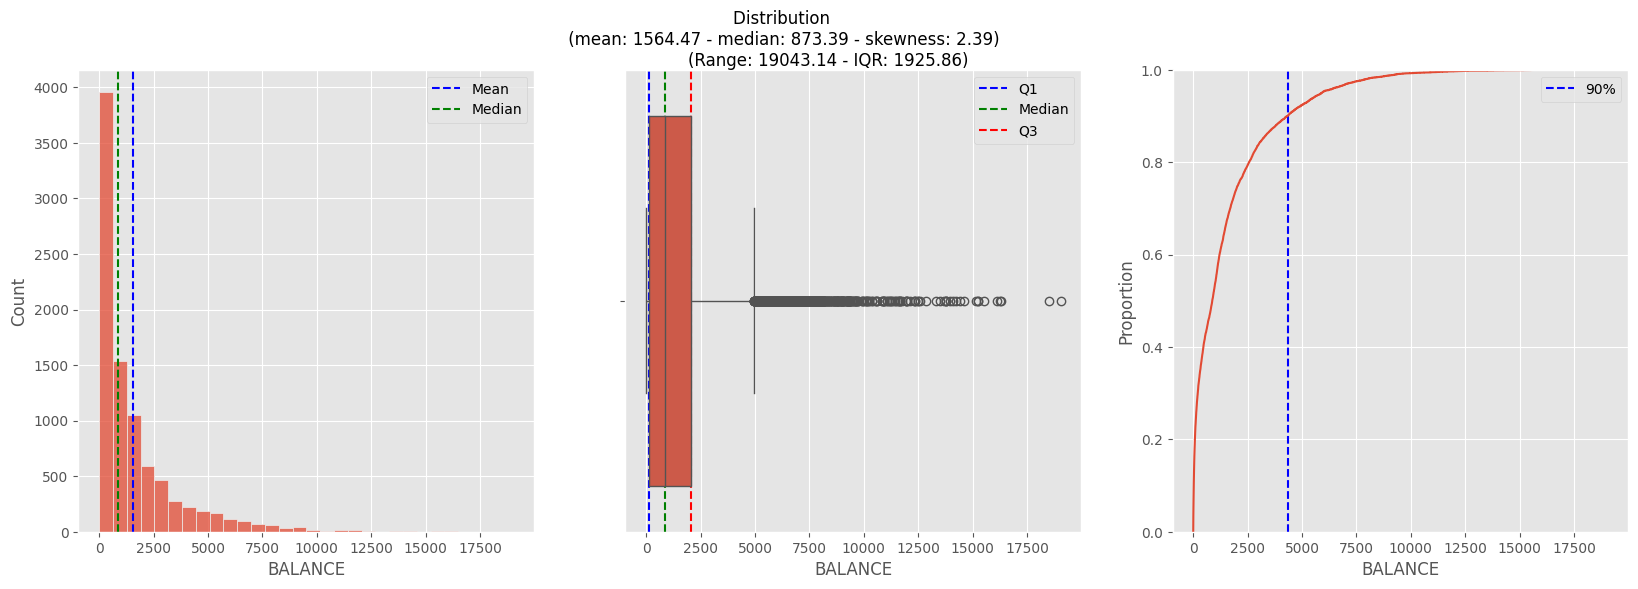

In [15]:
plot_numeric(df, "BALANCE")

In [16]:
df["BALANCE"].describe()

count     8950.000000
mean      1564.474828
std       2081.531879
min          0.000000
25%        128.281915
50%        873.385231
75%       2054.140036
max      19043.138560
Name: BALANCE, dtype: float64

**Summary:**

* According to histograms, the data is extremely right skewed, due to the presence of outliers. So, data transformation is required to avoid bias predictions.
* According to boxplot, there are a lot of outliers.
* The median is the best measure to find the "credit balance" average, due to its robustness to asymmetrical data. In this case, the average is USD 873.39.
* Most people have "credit balance" between USD 873.39 and USD 2054.14.
* 90% of cases are below than USD 5000.

**PURCHASES**

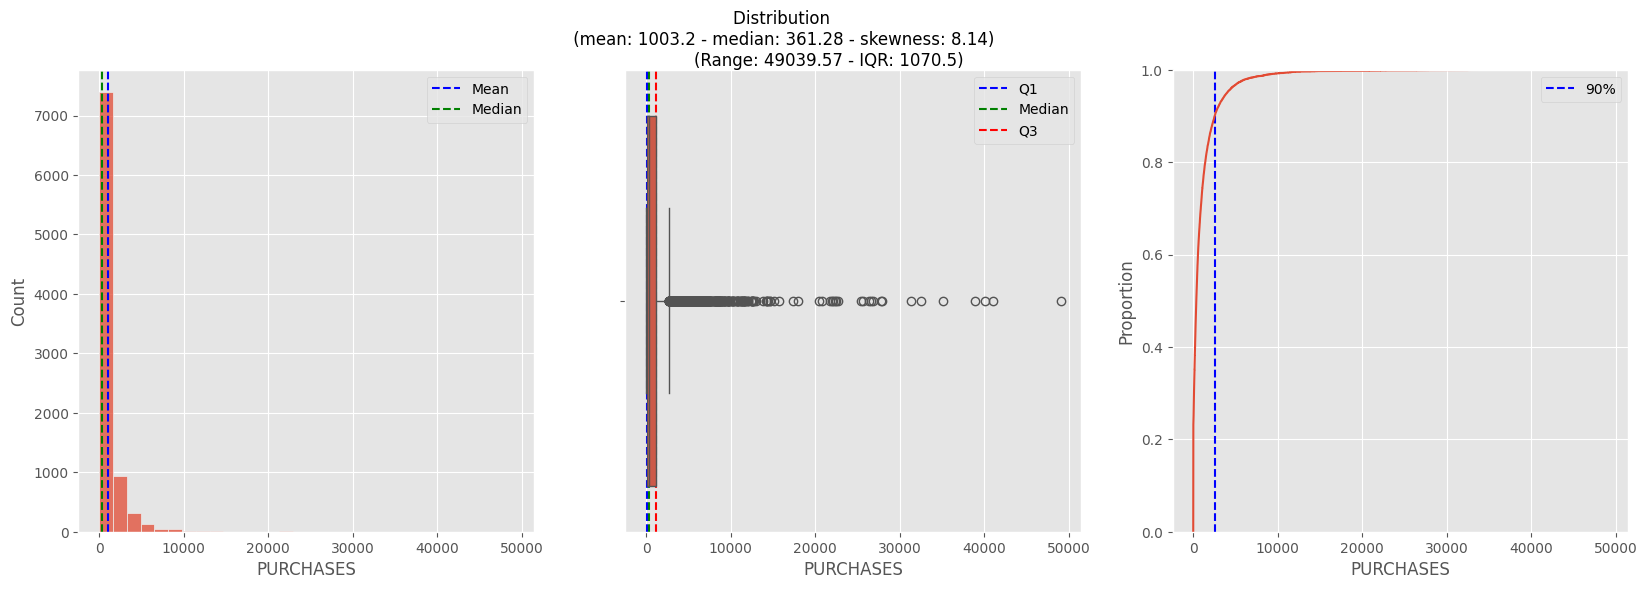

In [17]:
plot_numeric(df, "PURCHASES")

In [18]:
df["PURCHASES"].describe()

count     8950.000000
mean      1003.204834
std       2136.634782
min          0.000000
25%         39.635000
50%        361.280000
75%       1110.130000
max      49039.570000
Name: PURCHASES, dtype: float64

**Summary:**

* According to histograms, the data is extremely right skewed, due to the presence of outliers. So, data transformation is required to avoid bias predictions.
* According to boxplot, there are a lot of outliers.
* The median is the best measure to find the "purchases" average, due to its robustness to asymmetrical data. In this case, the average is USD 361.28.
* Most people have "purchases" between USD 361.28 and USD 1110.13.
* 90% of cases are below than USD 2500.

**ONEOFF_PURCHASES**

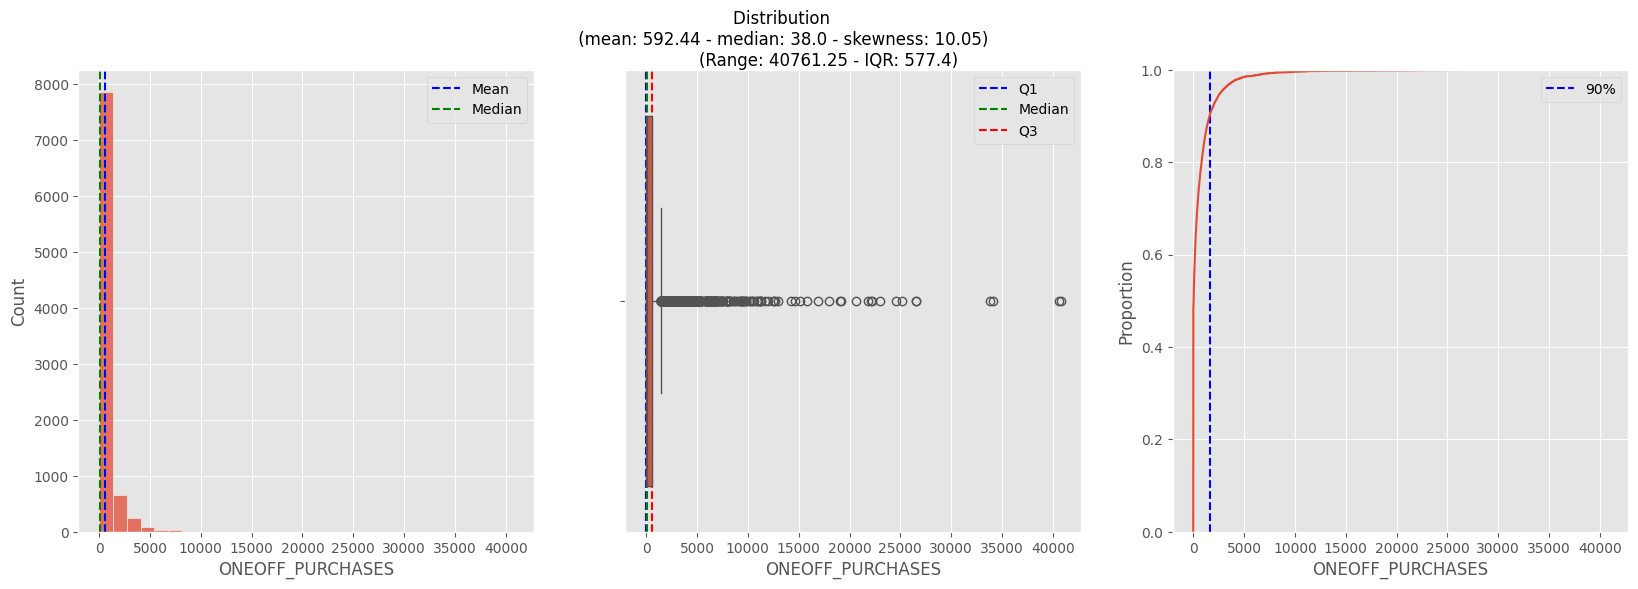

In [19]:
plot_numeric(df, "ONEOFF_PURCHASES")

In [20]:
df["ONEOFF_PURCHASES"].describe()

count     8950.000000
mean       592.437371
std       1659.887917
min          0.000000
25%          0.000000
50%         38.000000
75%        577.405000
max      40761.250000
Name: ONEOFF_PURCHASES, dtype: float64

**Summary:**

* According to histograms, the data is extremely right skewed, due to the presence of outliers. So, data transformation is required to avoid bias predictions.
* According to boxplot, there are a lot of outliers.
* The median is the best measure to find the "one-off purchases" average, due to its robustness to asymmetrical data. In this case, the average is USD 38.
* Most people made "one-off purchases" between USD 38 and USD 577.40.
* 90% of cases are below than USD 1600.

**INSTALLMENTS_PURCHASES**

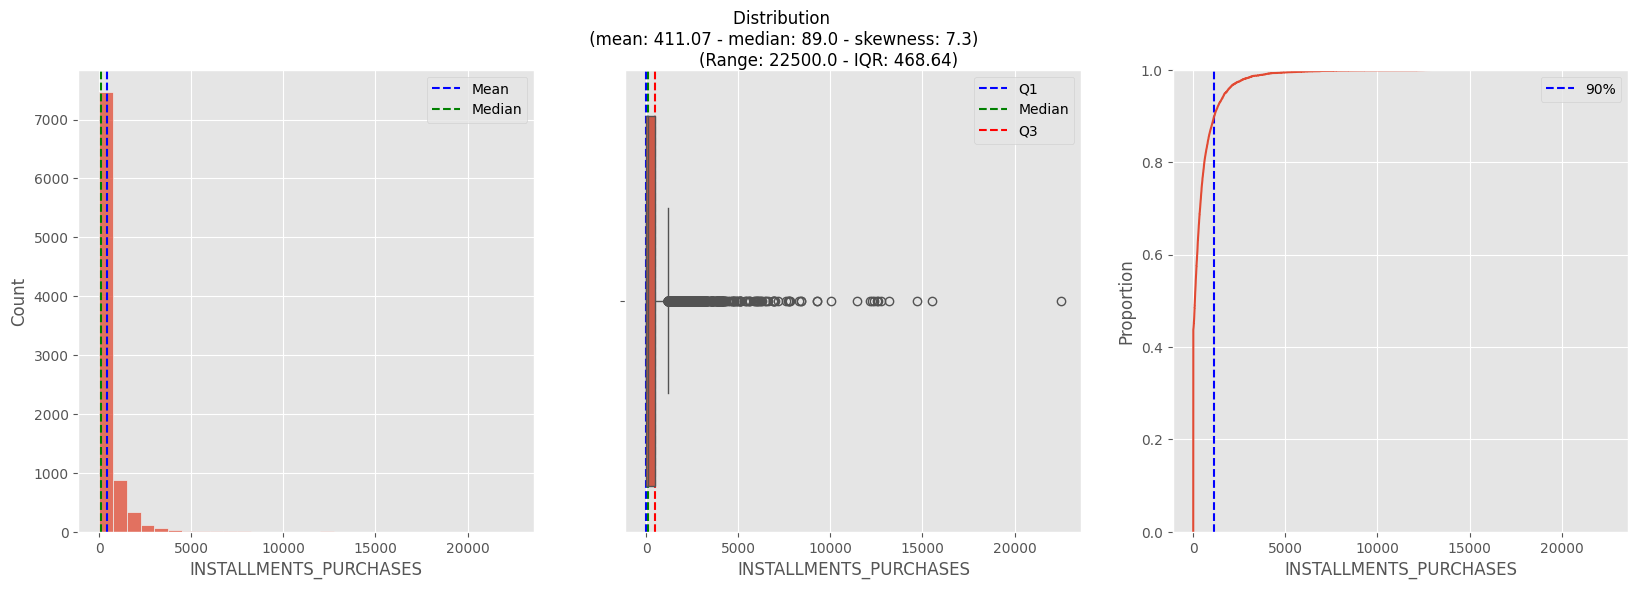

In [21]:
plot_numeric(df, "INSTALLMENTS_PURCHASES")

In [22]:
df["INSTALLMENTS_PURCHASES"].describe()

count     8950.000000
mean       411.067645
std        904.338115
min          0.000000
25%          0.000000
50%         89.000000
75%        468.637500
max      22500.000000
Name: INSTALLMENTS_PURCHASES, dtype: float64

**Summary:**

* According to histograms, the data is extremely right skewed, due to the presence of outliers. So, data transformation is required to avoid bias predictions.
* According to boxplot, there are a lot of outliers.
* The median is the best measure to find the "installment purchases" average, due to its robustness to asymmetrical data. In this case, the average is USD 89.
* Most people made "installment purchases" between USD 89 and USD 468.64.
* 90% of cases are below than USD 1140.

**CASH_ADVANCE**

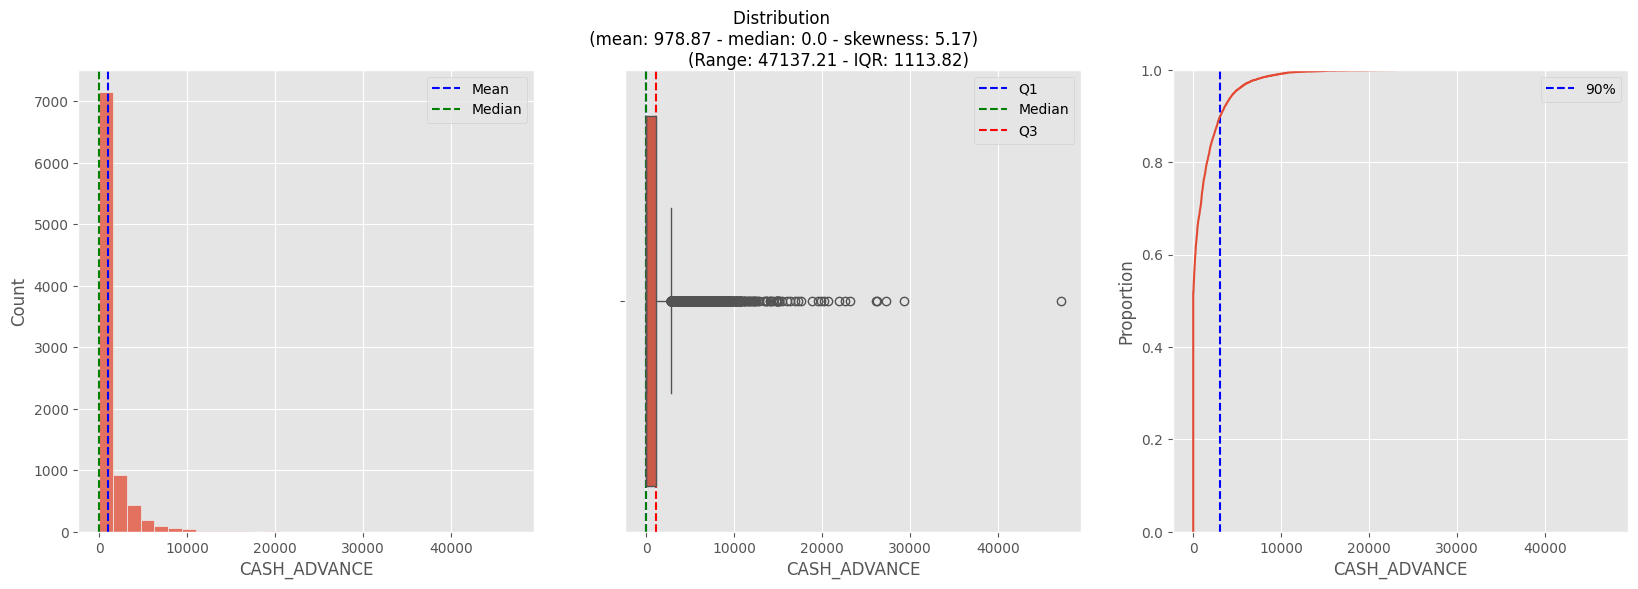

In [23]:
plot_numeric(df, "CASH_ADVANCE")

In [24]:
df["CASH_ADVANCE"].describe()

count     8950.000000
mean       978.871112
std       2097.163877
min          0.000000
25%          0.000000
50%          0.000000
75%       1113.821139
max      47137.211760
Name: CASH_ADVANCE, dtype: float64

**Summary:**

* According to histograms, the data is extremely right skewed, due to the presence of outliers. So, data transformation is required to avoid bias predictions.
* According to boxplot, there are a lot of outliers.
* Half of the cases did not make a cash advance payment.
* People who made a cash advance payment, paid USD 1113.82 approximately.

**CASH_ADVANCE_TRX**

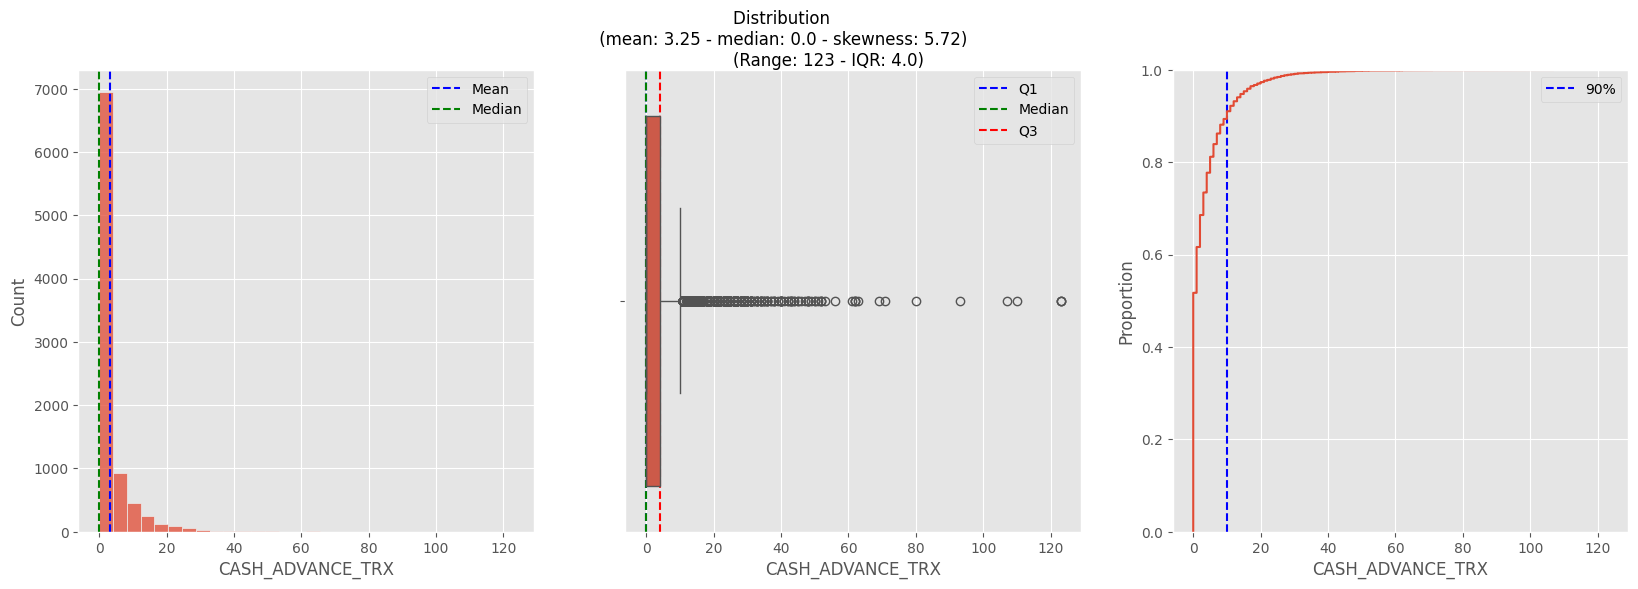

In [25]:
plot_numeric(df, "CASH_ADVANCE_TRX")

In [26]:
df["CASH_ADVANCE_TRX"].describe()

count    8950.000000
mean        3.248827
std         6.824647
min         0.000000
25%         0.000000
50%         0.000000
75%         4.000000
max       123.000000
Name: CASH_ADVANCE_TRX, dtype: float64

**Summary:**

* According to histograms, the data is extremely right skewed, due to the presence of outliers. So, data transformation is required to avoid bias predictions.
* According to boxplot, there are a lot of outliers.
* Half of the cases did not make a cash advance trx payment.
* People who made a cash advance trx payment, paid USD 4 approximately.
* 90% of people made a cash advance trx payment, paid USD 10 approximately.

**PURCHASES_TRX**

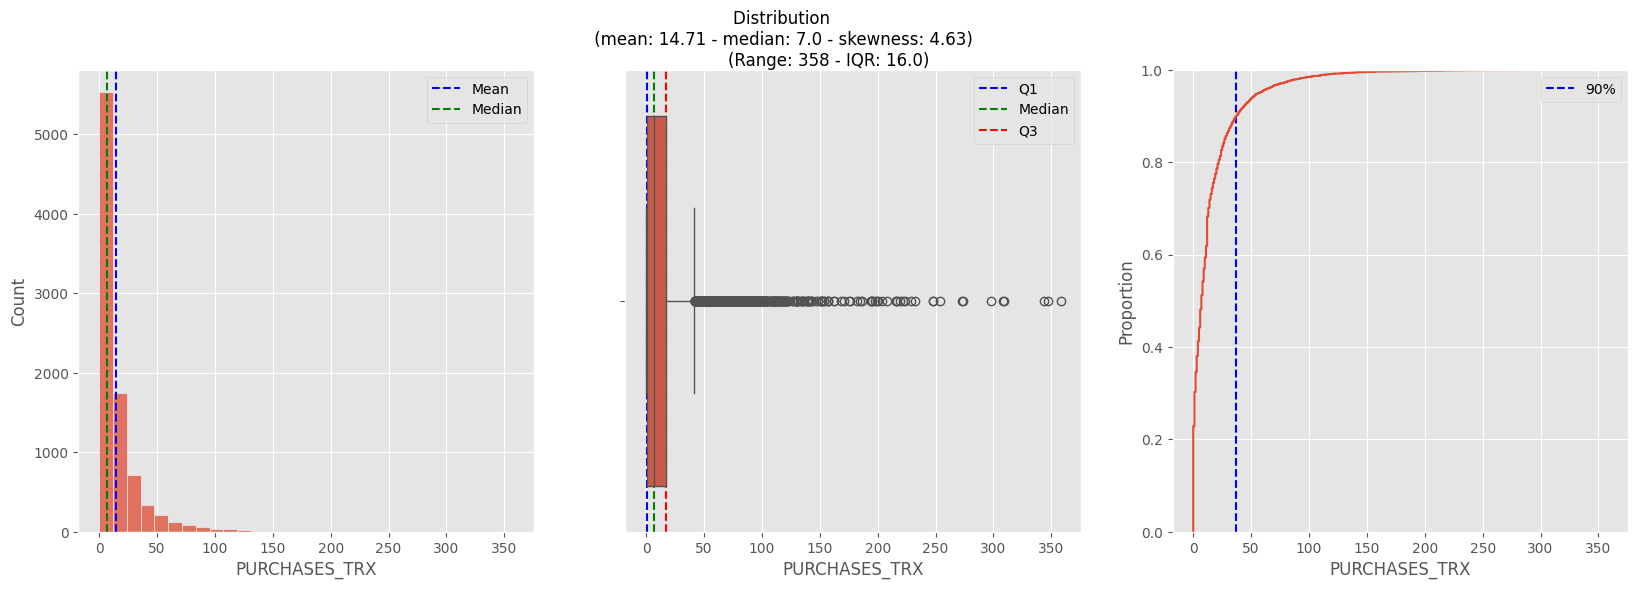

In [27]:
plot_numeric(df, "PURCHASES_TRX")

In [28]:
df["PURCHASES_TRX"].describe()

count    8950.000000
mean       14.709832
std        24.857649
min         0.000000
25%         1.000000
50%         7.000000
75%        17.000000
max       358.000000
Name: PURCHASES_TRX, dtype: float64

**Summary:**

* According to histograms, the data is extremely right skewed, due to the presence of outliers. So, data transformation is required to avoid bias predictions.
* According to boxplot, there are a lot of outliers.
* Half of the cases made a purchase trx of USD 7 approximately.
* Most people made "purchase trx" between USD 7 and USD 17.
* 90% of people, who made a "purchase trx", paid USD 37 approximately.

**CREDIT_LIMIT**

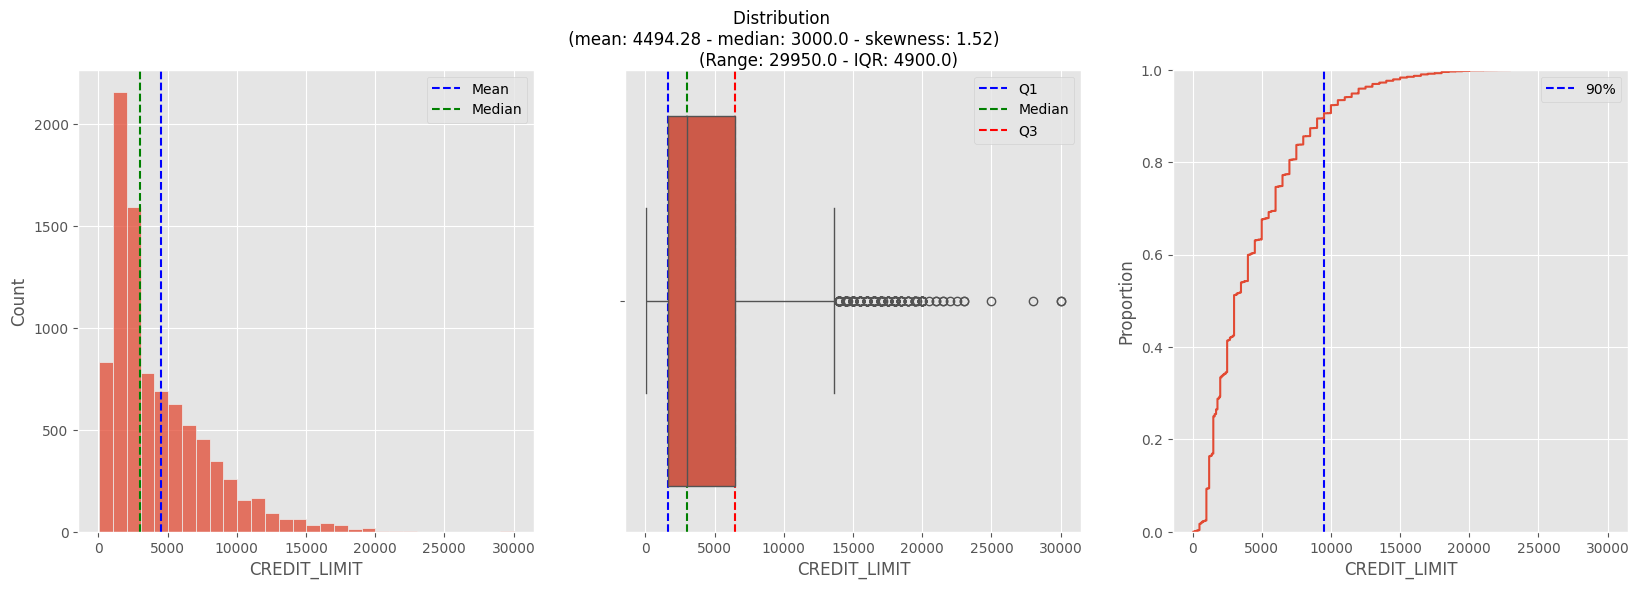

In [29]:
plot_numeric(df, "CREDIT_LIMIT")

In [30]:
df["CREDIT_LIMIT"].describe()

count     8950.000000
mean      4494.282473
std       3638.646702
min         50.000000
25%       1600.000000
50%       3000.000000
75%       6500.000000
max      30000.000000
Name: CREDIT_LIMIT, dtype: float64

**Summary:**

* According to histograms, the data is right skewed, due to the presence of outliers. So, data transformation is required to avoid bias predictions.
* According to boxplot, there are several outliers.
* Half of the cases had a credit limit of USD 3000.
* Most people had a credit limit between USD 3000 and USD 6500.
* 90% of people had a credit limit of USD 9500.

**PAYMENTS**

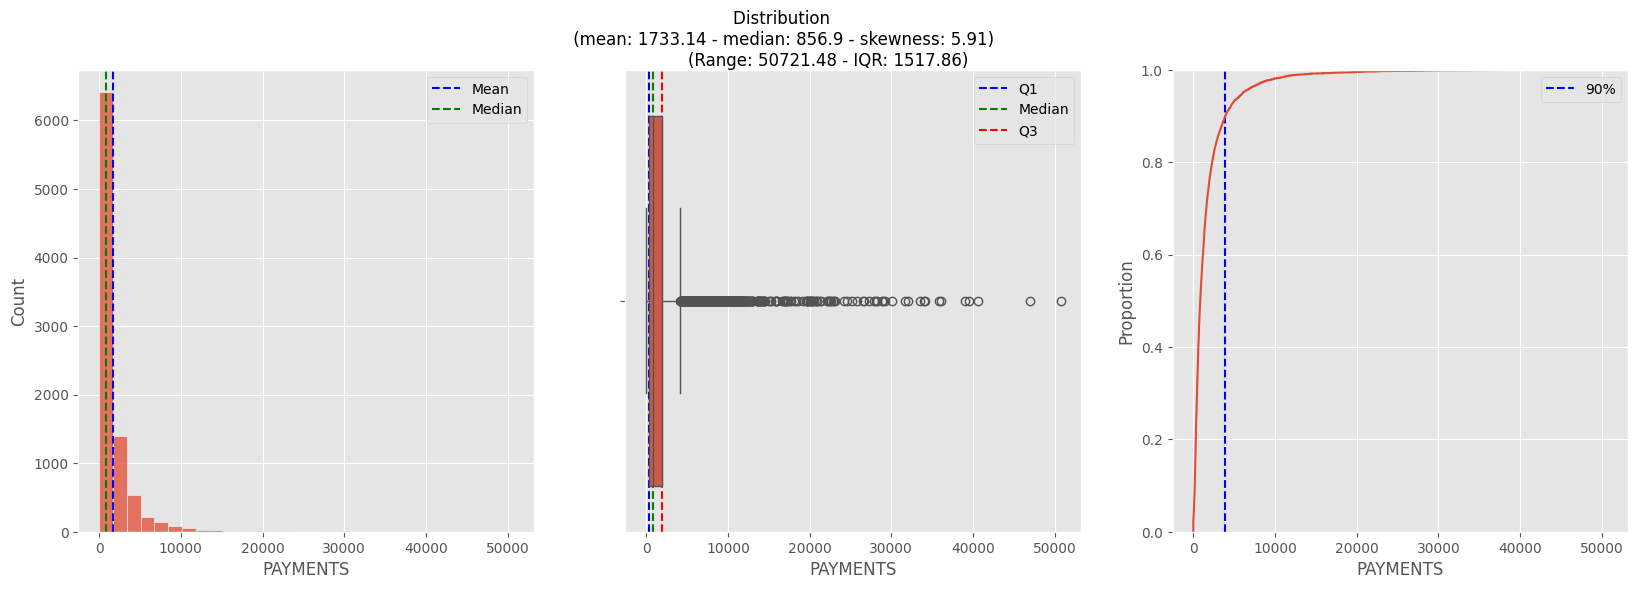

In [31]:
plot_numeric(df, "PAYMENTS")

In [32]:
df["PAYMENTS"].describe()

count     8950.000000
mean      1733.143852
std       2895.063757
min          0.000000
25%        383.276166
50%        856.901546
75%       1901.134317
max      50721.483360
Name: PAYMENTS, dtype: float64

**Summary:**

* According to histograms, the data is extremely right skewed, due to the presence of outliers. So, data transformation is required to avoid bias predictions.
* According to boxplot, there are a lot of outliers.
* Half of the cases made a payment of up to USD 856.90.
* Most people made a payment between USD 856.90 and USD 1901.13.
* 90% of people made a payment of up to USD 3923.

**MINIMUM_PAYMENTS**

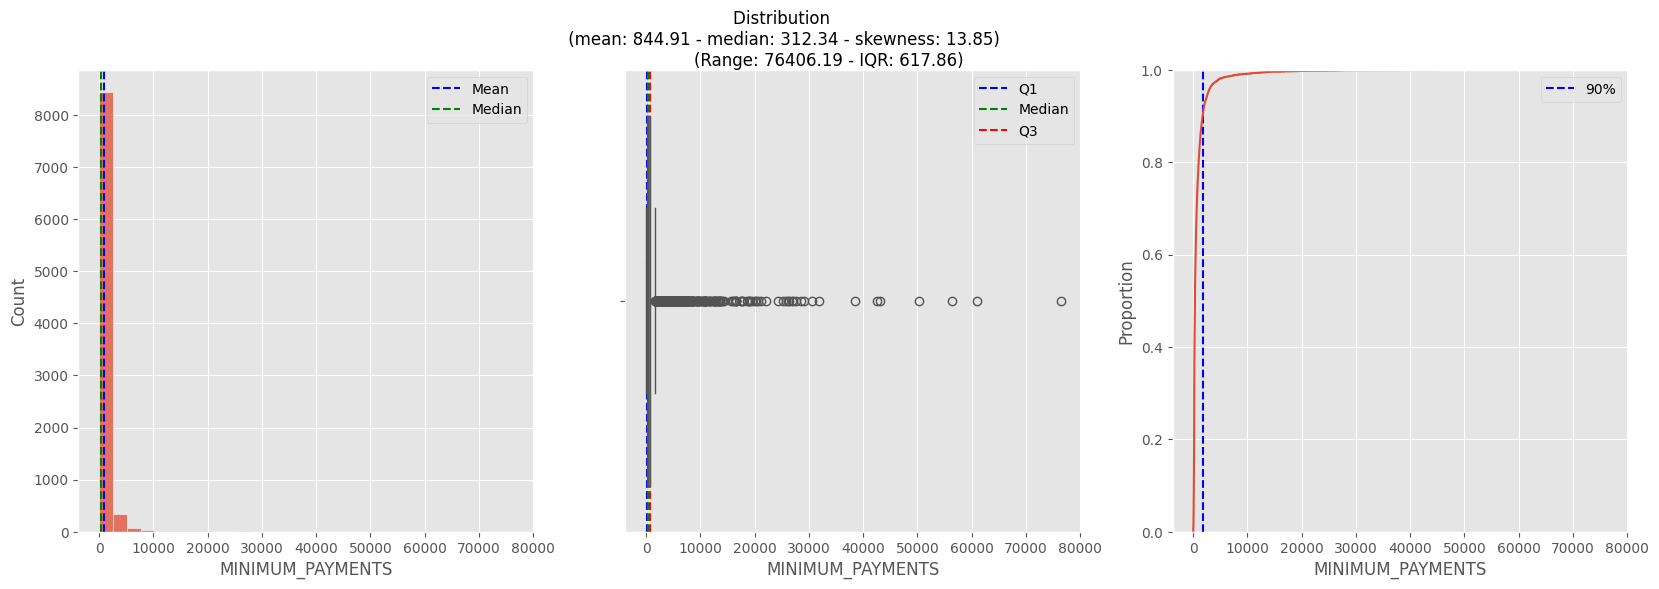

In [33]:
plot_numeric(df, "MINIMUM_PAYMENTS")

In [34]:
df["MINIMUM_PAYMENTS"].describe()

count     8950.000000
mean       844.906767
std       2332.792322
min          0.019163
25%        170.857654
50%        312.343947
75%        788.713501
max      76406.207520
Name: MINIMUM_PAYMENTS, dtype: float64

**Summary:**

* According to histograms, the data is extremely right skewed, due to the presence of outliers. So, data transformation is required to avoid bias predictions.
* According to boxplot, there are a lot of outliers.
* Half of the cases made a minimum payment of up to USD 335.63.
* Most people made a minimum payment between USD 335.63 and USD 864.20.
* 90% of people made a minimum payment of up to USD 1732.69.

**BALANCE_FREQUENCY**

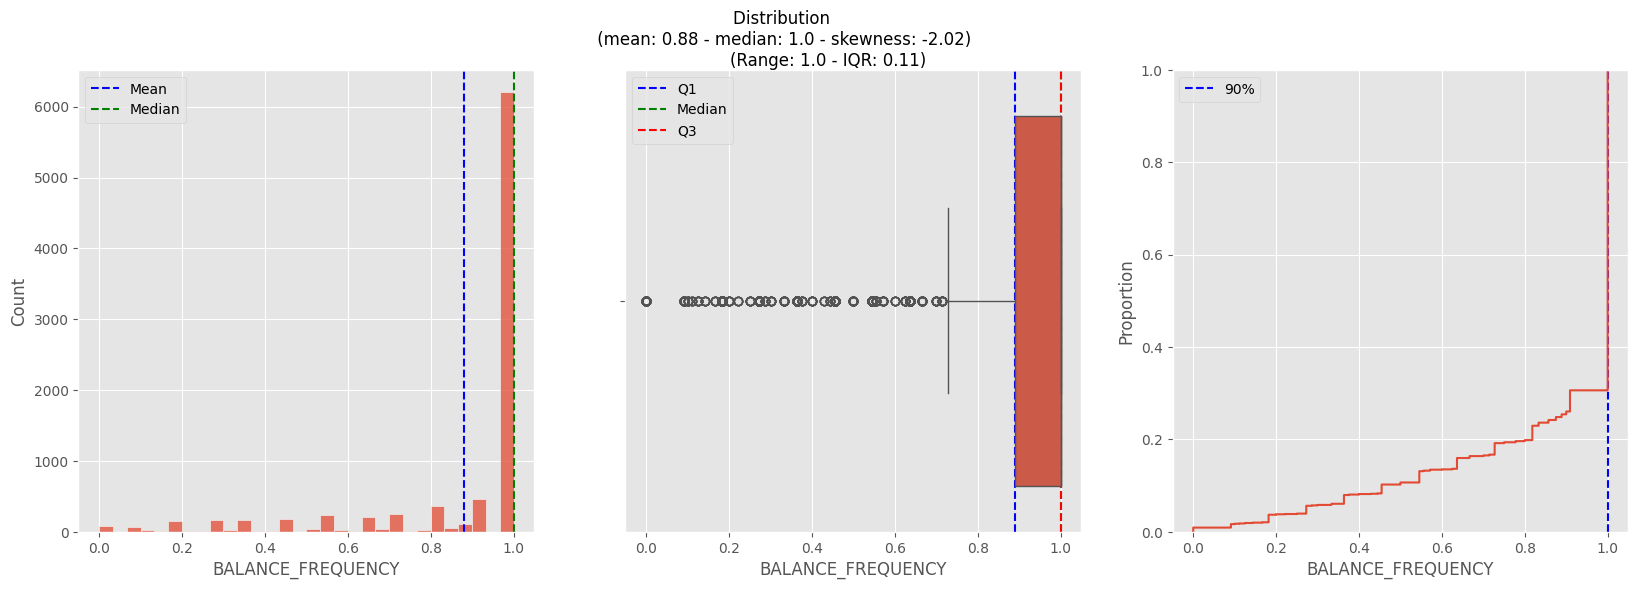

In [35]:
plot_numeric(df, "BALANCE_FREQUENCY")

In [36]:
df["BALANCE_FREQUENCY"].describe()

count    8950.000000
mean        0.877271
std         0.236904
min         0.000000
25%         0.888889
50%         1.000000
75%         1.000000
max         1.000000
Name: BALANCE_FREQUENCY, dtype: float64

**Summary:**

* This feature behaves more like a categorical one, where most cases belong to value 1.
* The values range from 0 to 1.

**PURCHASES_FREQUENCY**

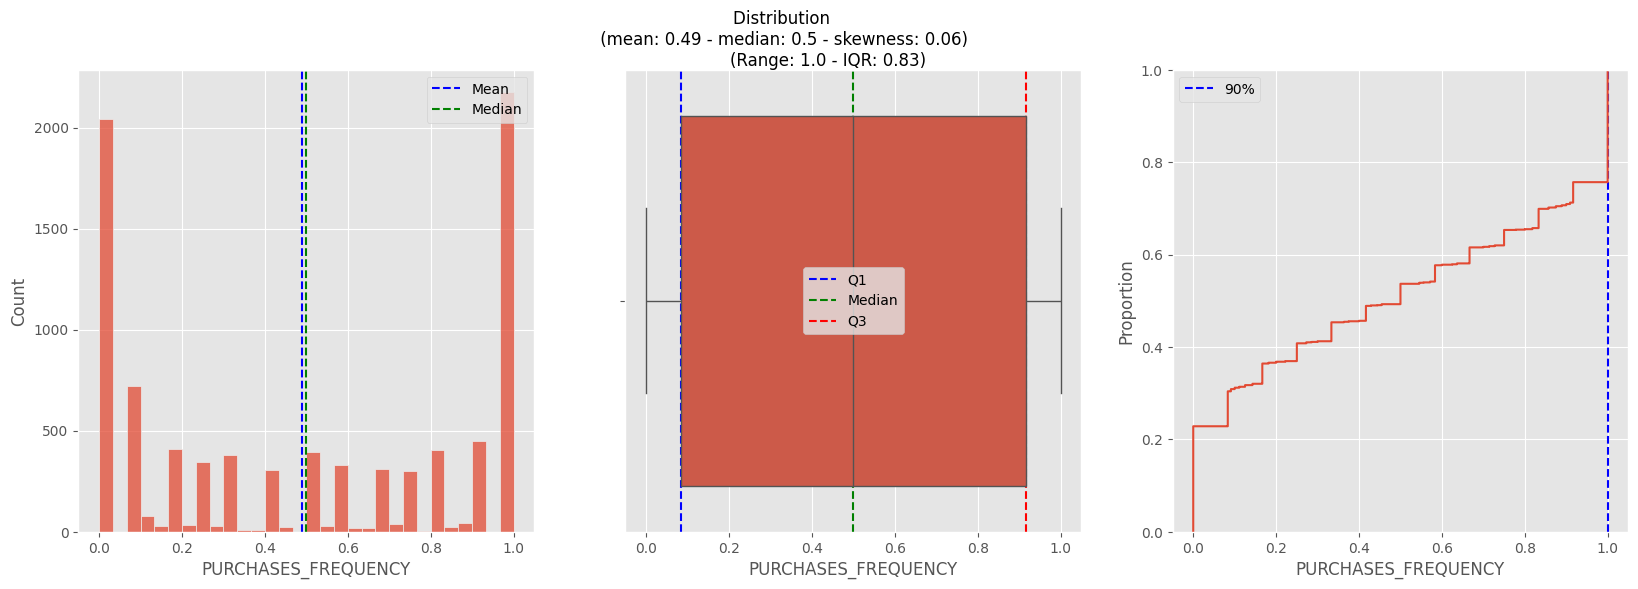

In [37]:
plot_numeric(df, "PURCHASES_FREQUENCY")

In [38]:
df["PURCHASES_FREQUENCY"].describe()

count    8950.000000
mean        0.490351
std         0.401371
min         0.000000
25%         0.083333
50%         0.500000
75%         0.916667
max         1.000000
Name: PURCHASES_FREQUENCY, dtype: float64

**Summary:**

* This feature behaves more like a categorical one, where most cases belong to value 0 and 1.
* The values range from 0 to 1.

**ONEOFF_PURCHASES_FREQUENCY**

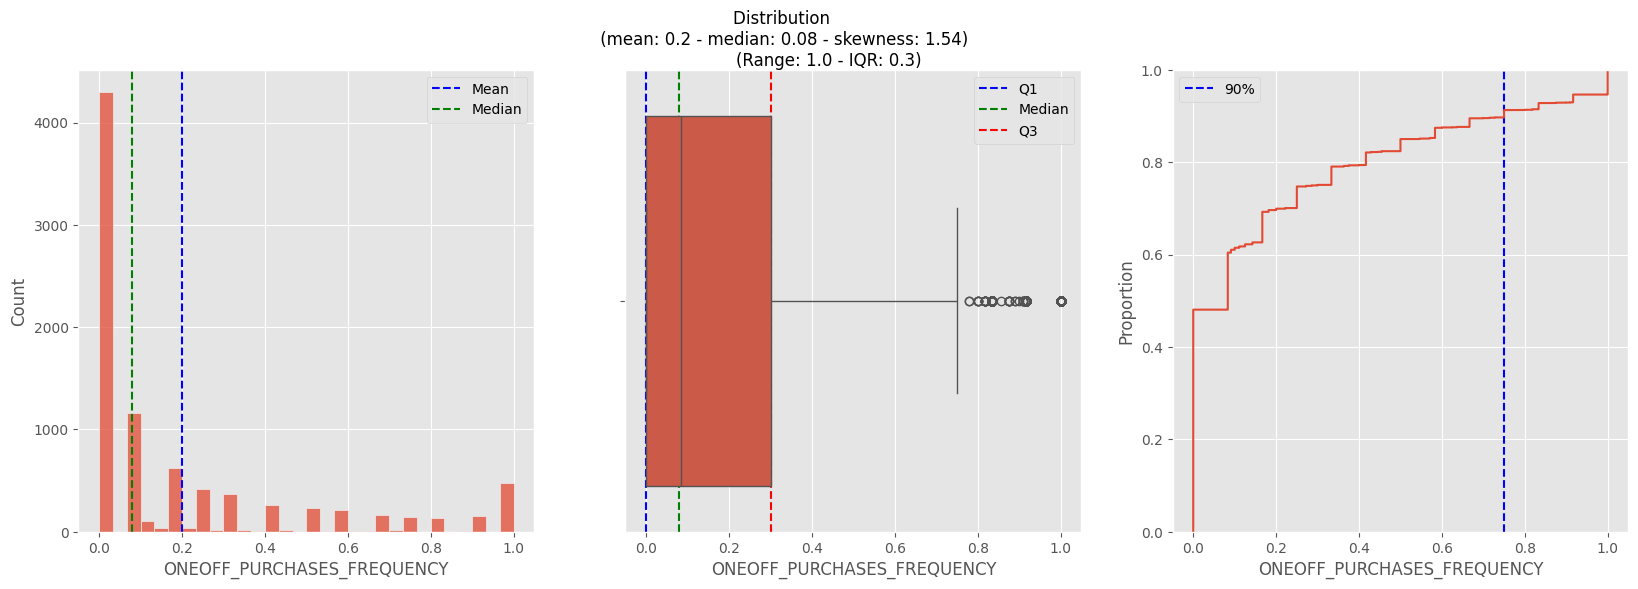

In [39]:
plot_numeric(df, "ONEOFF_PURCHASES_FREQUENCY")

In [40]:
df["ONEOFF_PURCHASES_FREQUENCY"].describe()

count    8950.000000
mean        0.202458
std         0.298336
min         0.000000
25%         0.000000
50%         0.083333
75%         0.300000
max         1.000000
Name: ONEOFF_PURCHASES_FREQUENCY, dtype: float64

**Summary:**

* This feature behaves more like a categorical one, where most cases belong to value 0.
* The values range from 0 to 1.

**PURCHASES_INSTALLMENTS_FREQUENCY**

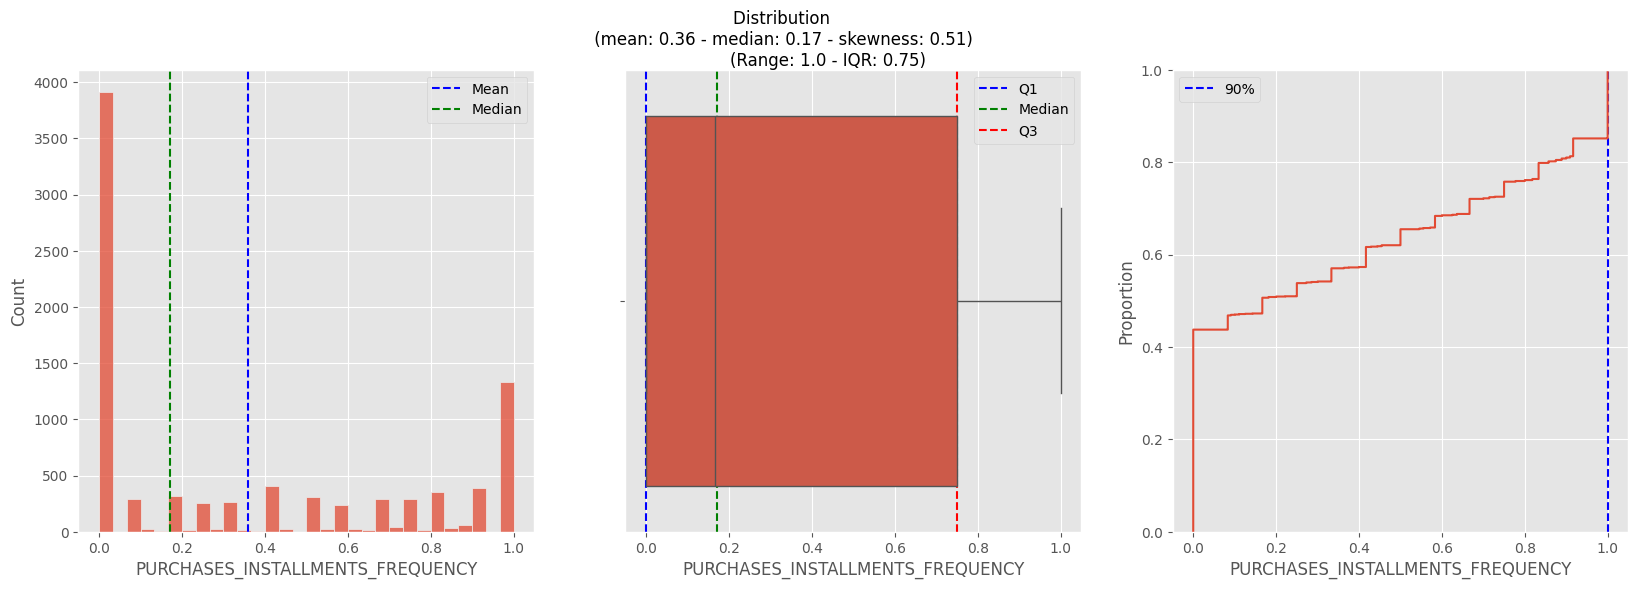

In [41]:
plot_numeric(df, "PURCHASES_INSTALLMENTS_FREQUENCY")

In [42]:
df["PURCHASES_INSTALLMENTS_FREQUENCY"].describe()

count    8950.000000
mean        0.364437
std         0.397448
min         0.000000
25%         0.000000
50%         0.166667
75%         0.750000
max         1.000000
Name: PURCHASES_INSTALLMENTS_FREQUENCY, dtype: float64

**Summary:**

* This feature behaves more like a categorical one, where most cases belong to value 0.
* The values range from 0 to 1.

**CASH_ADVANCE_FREQUENCY**

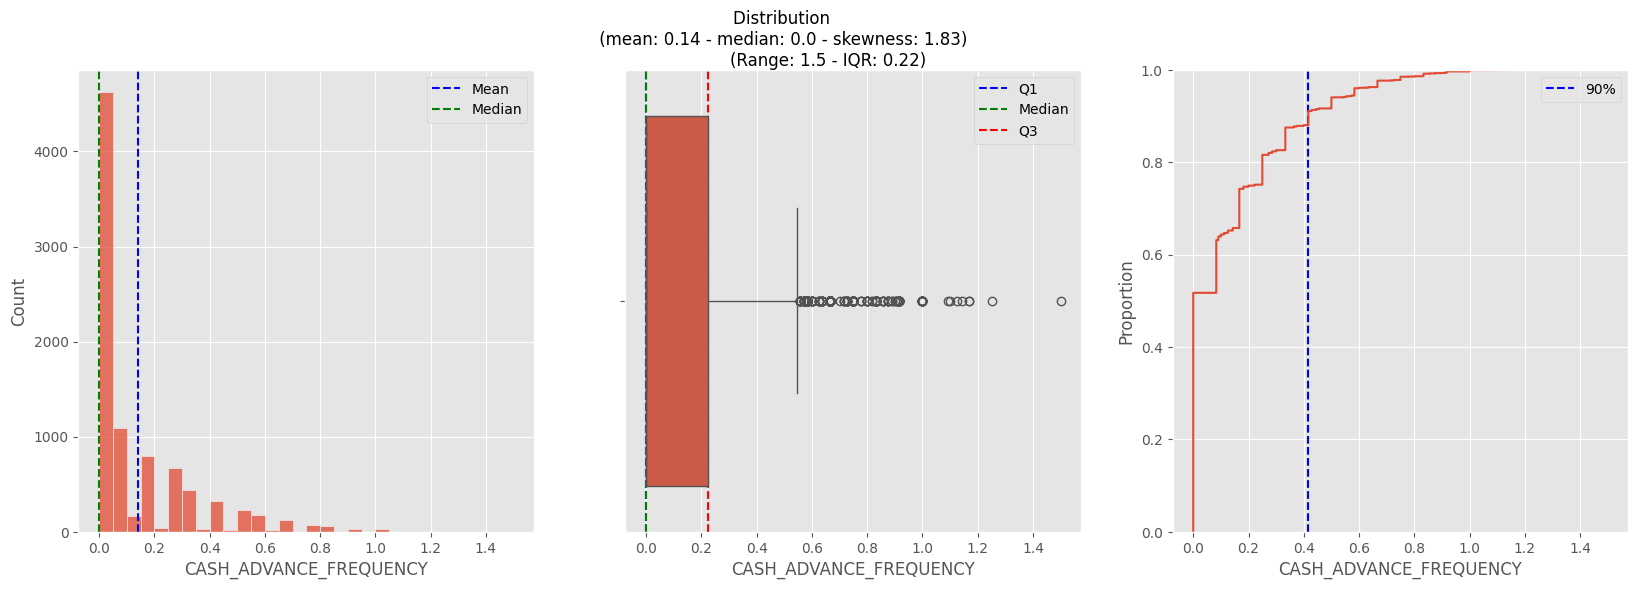

In [43]:
plot_numeric(df, "CASH_ADVANCE_FREQUENCY")

In [44]:
df["CASH_ADVANCE_FREQUENCY"].describe()

count    8950.000000
mean        0.135144
std         0.200121
min         0.000000
25%         0.000000
50%         0.000000
75%         0.222222
max         1.500000
Name: CASH_ADVANCE_FREQUENCY, dtype: float64

**Summary:**

* This feature behaves more like a categorical one, where most cases belong to value 0.
* The values range from 0 to 1.5.

**PRC_FULL_PAYMENT**

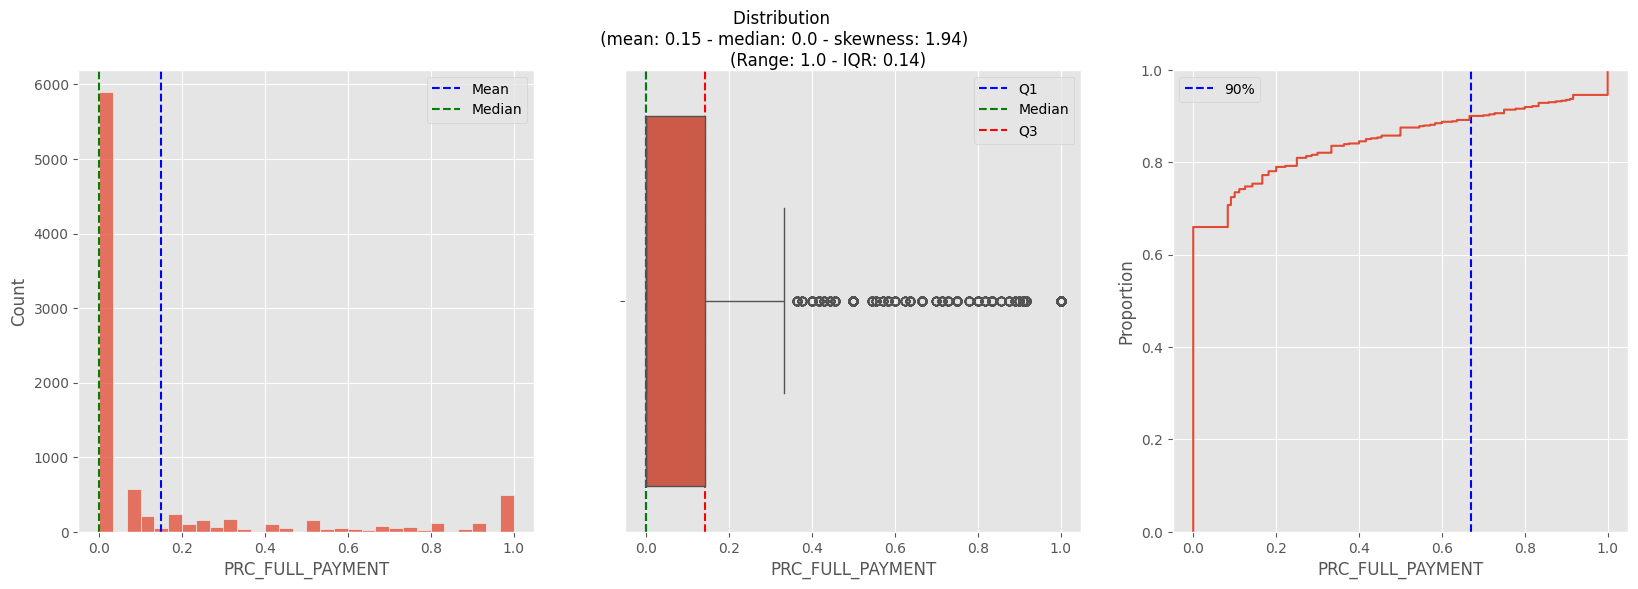

In [45]:
plot_numeric(df, "PRC_FULL_PAYMENT")

In [46]:
df["PRC_FULL_PAYMENT"].describe()

count    8950.000000
mean        0.153715
std         0.292499
min         0.000000
25%         0.000000
50%         0.000000
75%         0.142857
max         1.000000
Name: PRC_FULL_PAYMENT, dtype: float64

**Summary:**

* This feature behaves more like a categorical one, where most cases belong to value 0.
* The values range from 0 to 1.

##### 3.3.1.2. Calculate correlation

Due to data is extremely skew, the best option is to reduce skewness, before explore correlation. This idea of using correlation exploration is to identify strong relations among variables in order to remove some of them and reduce cardinality.

**Scale features**

In [47]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_scaled = scaler.fit_transform(df[numeric_features].values)

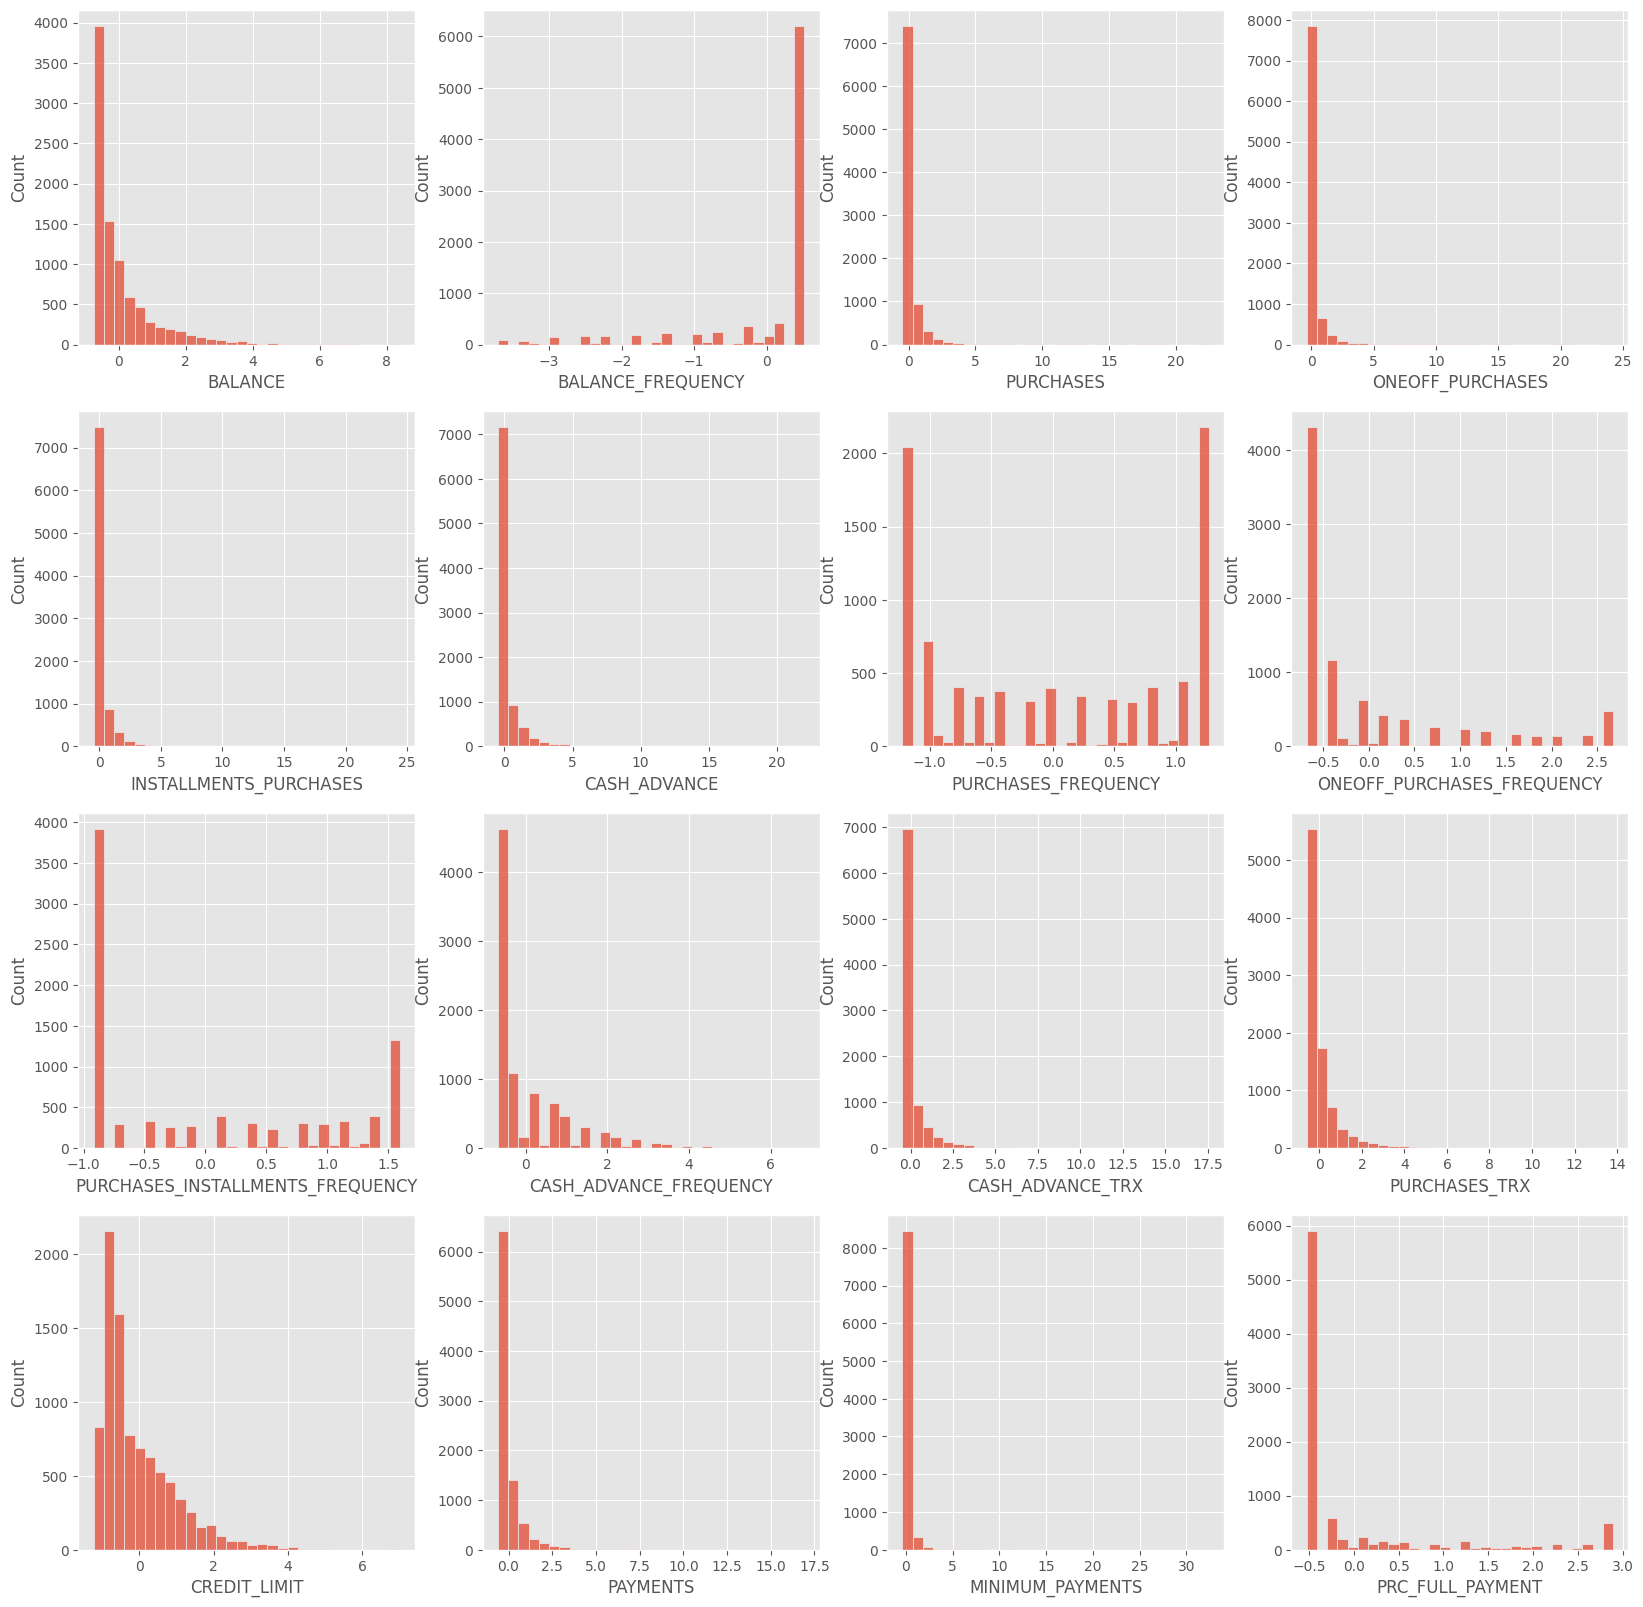

In [48]:
# Visualization
df_numeric_scaled = pd.DataFrame(x_scaled, columns = numeric_features)
fig, axes = plt.subplots(4, 4, figsize = (20, 20))
for index, (column_name, ax) in enumerate(zip(df_numeric_scaled, axes.flat)):
    sns.histplot(x = df_numeric_scaled[column_name], ax = ax, bins = 30)
plt.show()

**Remove skewness**

In [49]:
from sklearn.preprocessing import PowerTransformer

In [50]:
# Transformation for both positive and negative data
pt = PowerTransformer(method = "yeo-johnson", standardize = False)
x_transformed = pt.fit_transform(df_numeric_scaled.values)

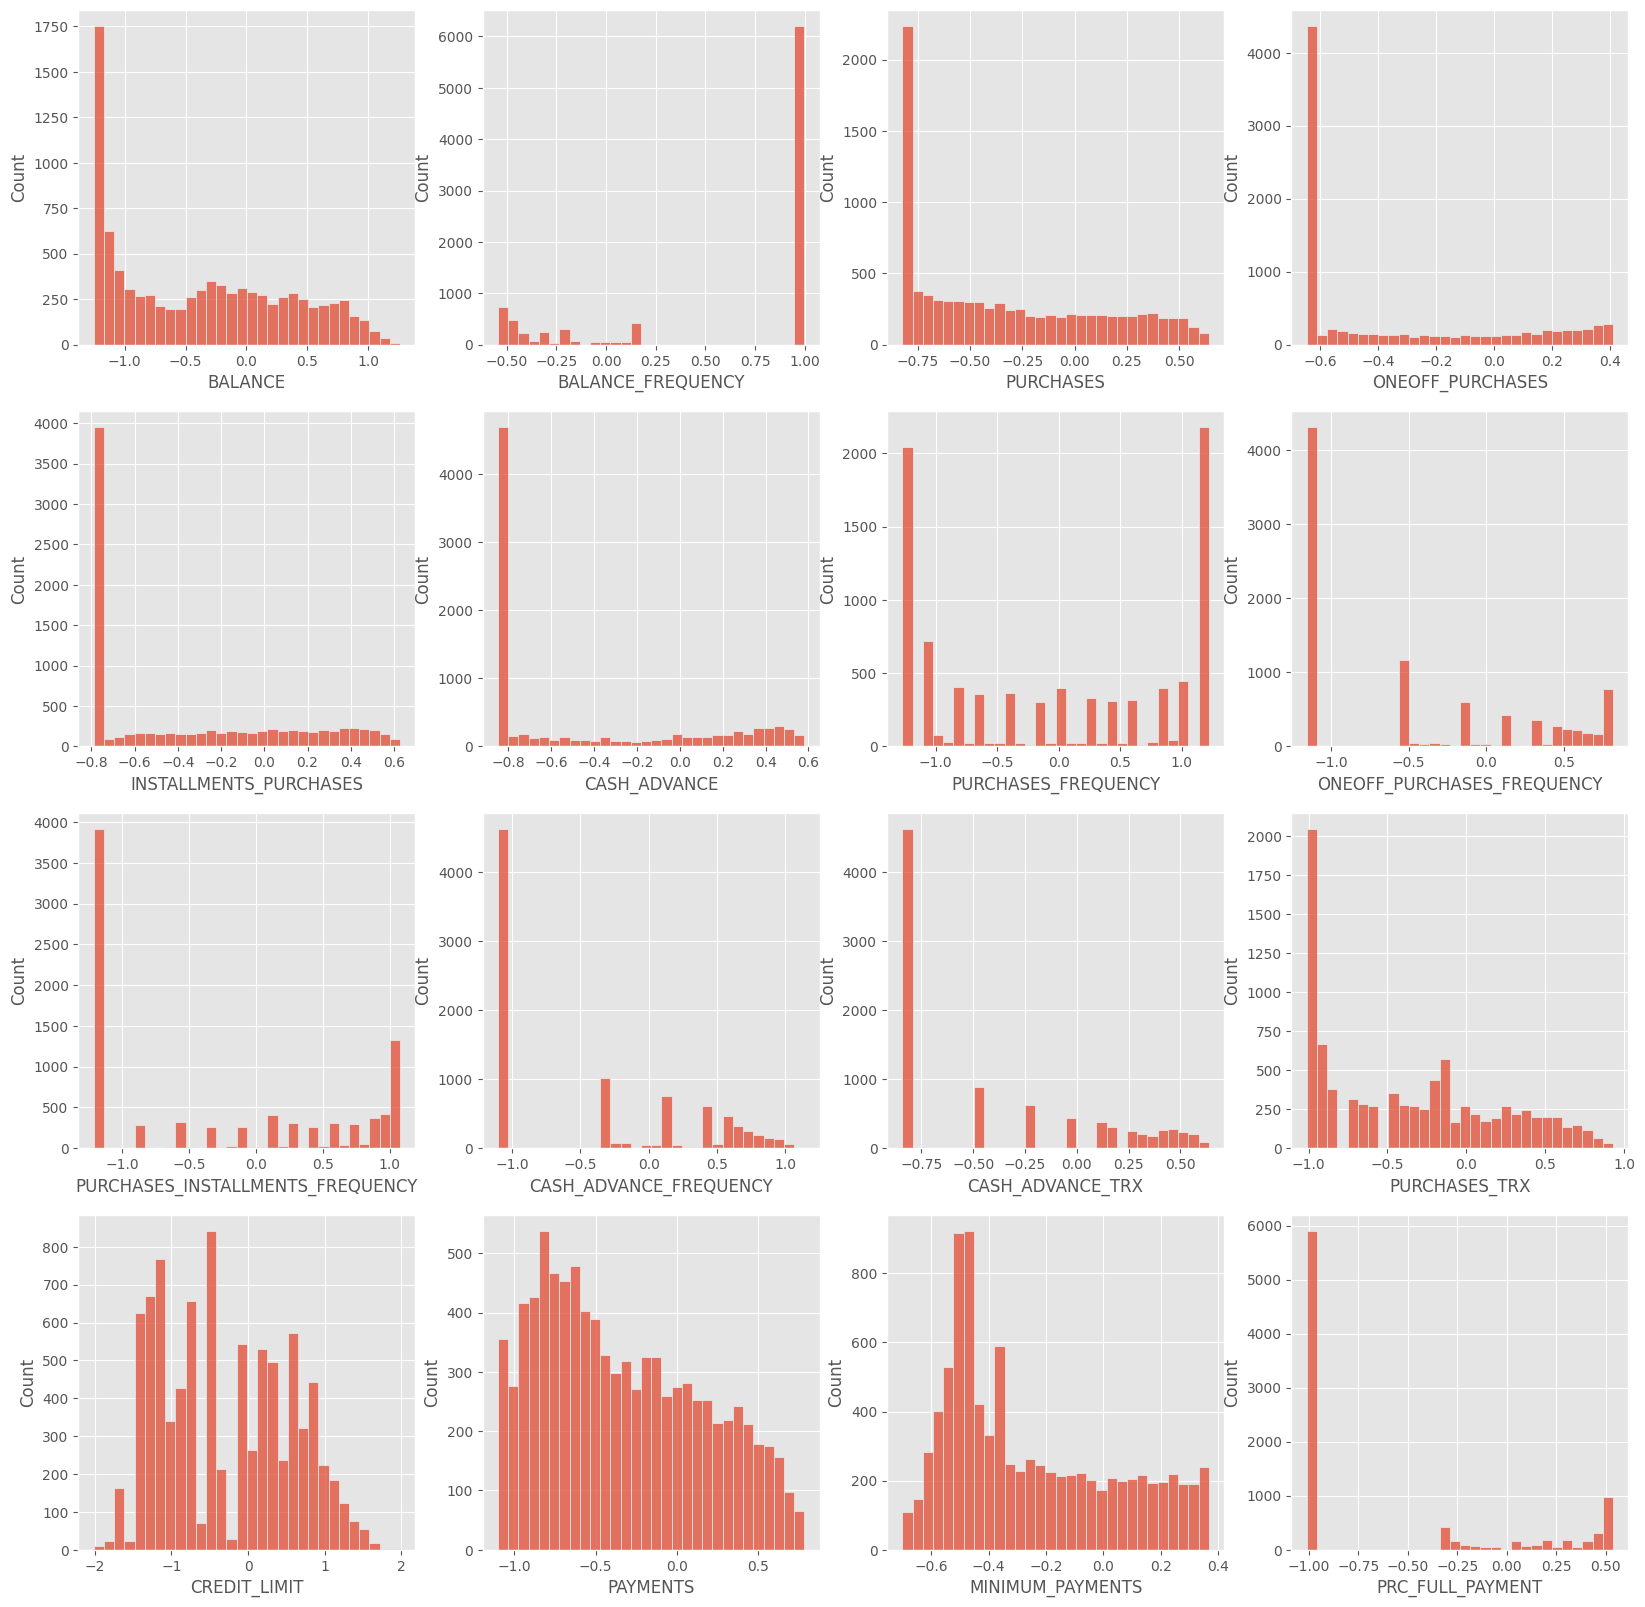

In [51]:
# Visualization
df_numeric_no_skewness = pd.DataFrame(x_transformed, columns = numeric_features)
fig, axes = plt.subplots(4, 4, figsize = (20, 20))
for index, (column_name, ax) in enumerate(zip(df_numeric_no_skewness, axes.flat)):
    sns.histplot(x = df_numeric_no_skewness[column_name], ax = ax, bins = 30)
plt.show()

**Show correlation**

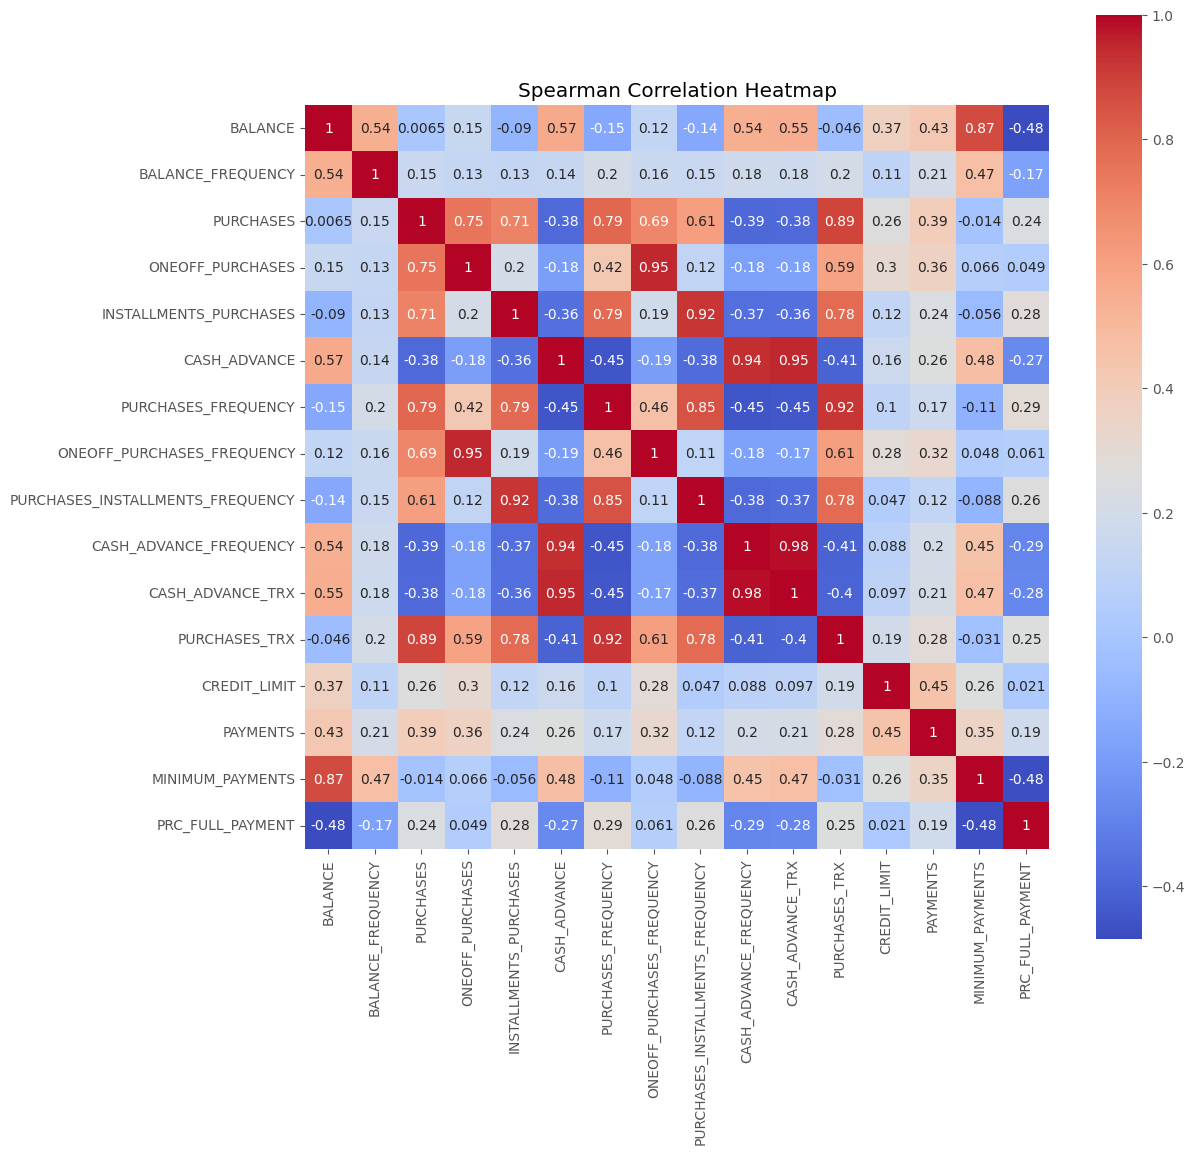

In [52]:
correlation_matrix = df_numeric_no_skewness.corr(method = "spearman")

plt.figure(figsize=(12, 12))
sns.heatmap(correlation_matrix, annot = True, cmap = "coolwarm", square = True)
plt.title("Spearman Correlation Heatmap")
plt.show()

In [53]:
def plot_scatter(df, variable_name_1, variable_name_2):
    plt.figure(figsize = (8, 6))
    sns.scatterplot(data = df, x = variable_name_1, y = variable_name_2)
    plt.title(f"Relationship between {variable_name_1} and {variable_name_2}")
    plt.show()

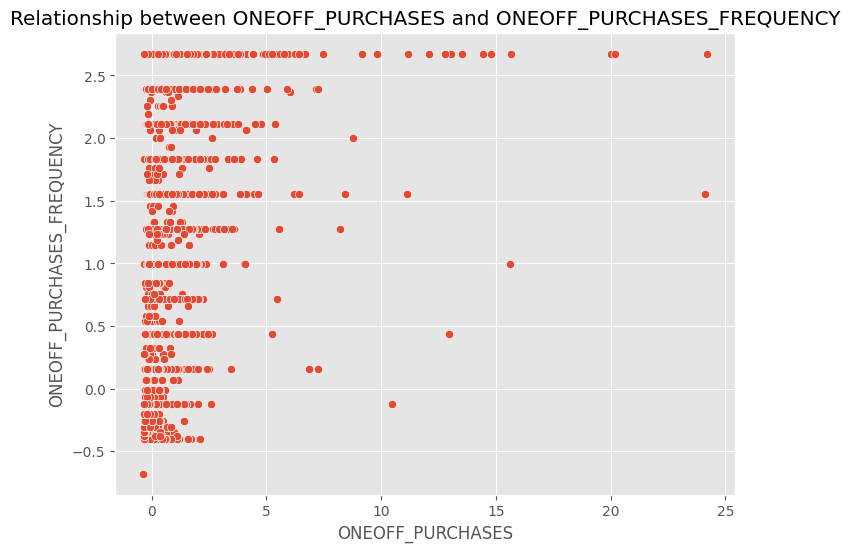

In [54]:
plot_scatter(df_numeric_scaled, "ONEOFF_PURCHASES", "ONEOFF_PURCHASES_FREQUENCY")

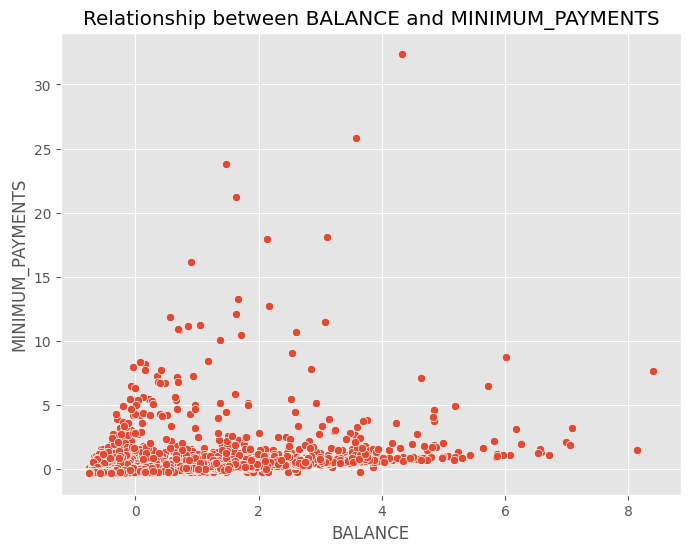

In [55]:
plot_scatter(df_numeric_scaled, "BALANCE", "MINIMUM_PAYMENTS")

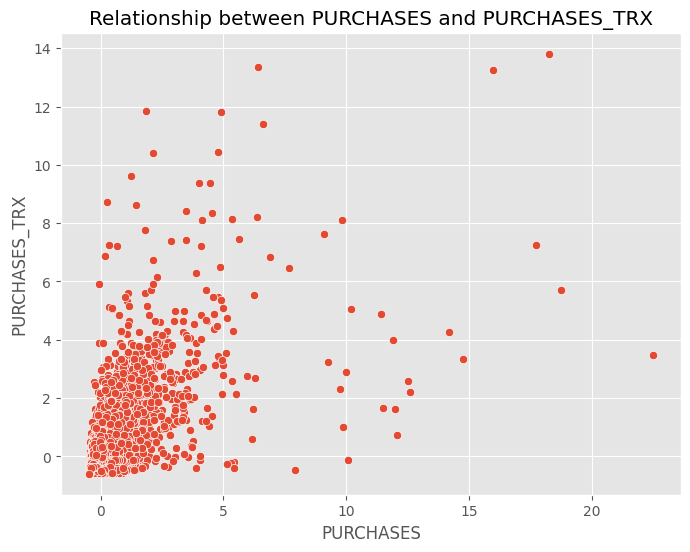

In [56]:
plot_scatter(df_numeric_scaled, "PURCHASES", "PURCHASES_TRX")

**Summary:**

There are variables with a strong and positive relationship like BALANCE and MINIMUM_PAYMENTS. However, when scatter plot is used to verify relationships, this way discards any clear multicollinearity, for example: ONEOFF_PURCHASES and ONEOFF_PURCHASES_FREQUENCY. So, it is better to preserve all variables.

#### 3.3.2. Categorical variables

In [57]:
categorical_features = ["TENURE"]

In [58]:
def plot_categorical(df, variable_name):
    plt.figure(figsize = (12, 6))
    sns.countplot(y = variable_name, data = df, order = df[variable_name].value_counts().index)
    plt.title("Frequency diagram")
    plt.xlabel("Frequencies")
    plt.show()

In [59]:
def create_frequency_table(df, column_name):
    abs_frequency = df[column_name].value_counts().sort_index()
    rel_frequency = abs_frequency / abs_frequency.sum()

    frequency_table = pd.DataFrame({
        "Absolute Frequency": abs_frequency,
        "Relative Frequency": rel_frequency.round(3)
    })

    total_row = pd.DataFrame({
        "Absolute Frequency": [abs_frequency.sum()],
        "Relative Frequency": [rel_frequency.sum()]
    }, index=["Total"])

    frequency_table = pd.concat([frequency_table, total_row])
    return frequency_table

In [60]:
frequency_table = create_frequency_table(df, "TENURE")
frequency_table

,Absolute Frequency,Relative Frequency
6,204,0.023
7,190,0.021
8,196,0.022
9,175,0.020
10,236,0.026
11,365,0.041
12,7584,0.847
Total,8950,1.000


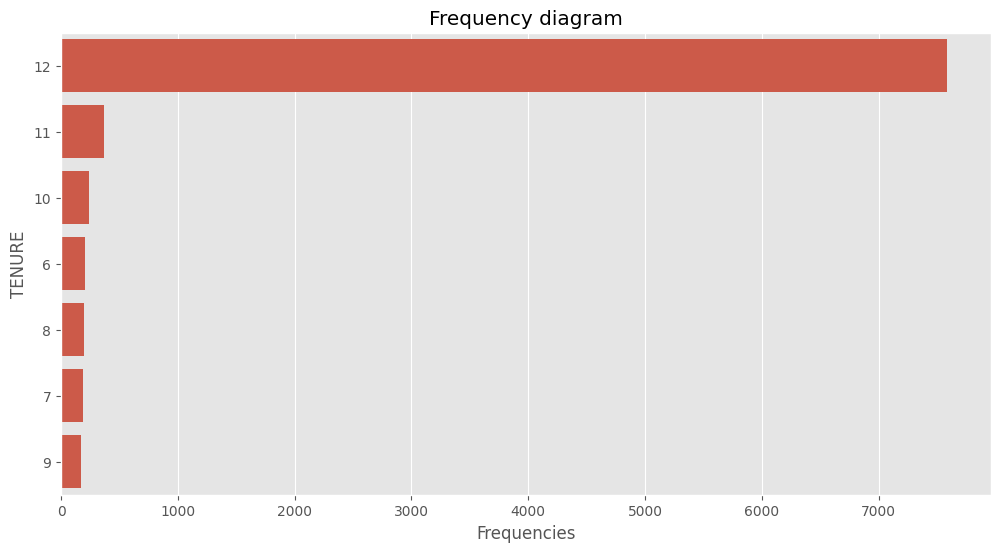

In [61]:
plot_categorical(df, "TENURE")

**Summary:**

* Most cases belong to category 12.
* Due to category 12 has the majority of data, this variable is imbalance and it could lead to bianess.

### 3.4. Dimensionality reduction

The goal of this step is to reduce dimensionality among numeric continuous variables preserving much information possible. Less dimensionality means less time processing for training and less risks of overfitting.

In addition to that, it is necessary to bear in mind the PCA is used for linear data. In this case, data seems to follow a non-linear bahavior, so, Kernel PCA would be a good option.

In [62]:
from sklearn.decomposition import PCA, KernelPCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

Get numeric values

In [63]:
x_scaled = df_numeric_scaled.values

#### 3.4.1. PCA

In [64]:
pca = PCA()
x_pca = pca.fit_transform(x_scaled)

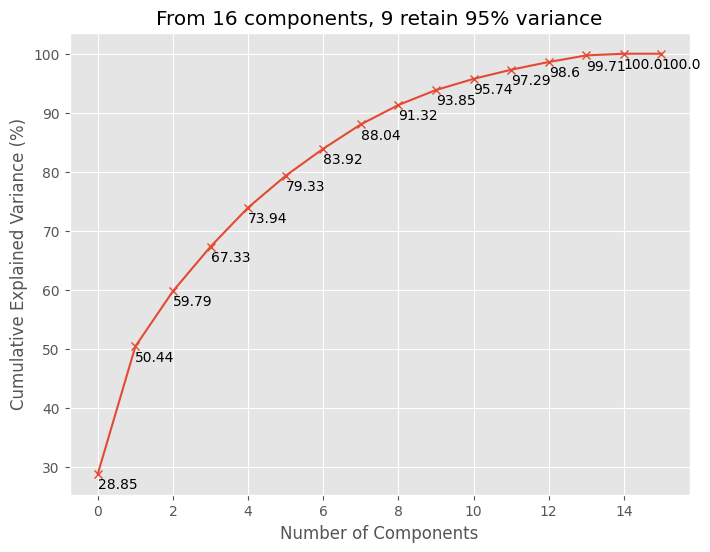

In [65]:
explained_variance = np.cumsum(pca.explained_variance_ratio_) * 100
n_components = np.argmax(explained_variance >= 90) + 1
components = list(range(x_scaled.shape[1]))

plt.figure(figsize = (8, 6))
for s, d in zip(components, explained_variance):
    plt.annotate(np.round(d, decimals = 2), xy = (s, d - 2.5))
plt.plot(explained_variance, marker = "x")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance (%)")
plt.grid(True)
plt.title(f"From {len(components)} components, {n_components} retain 95% variance")
plt.show()

In [66]:
pca = PCA(n_components = n_components)
x_pca = pca.fit_transform(x_scaled)
print("x_pca shape:", x_pca.shape)

x_pca shape: (8950, 9)


##### K-Means clustering

In [67]:
silhouette_scores = { "K": [], "scores": [] }
for k in range(2, 16):
    params = {"n_clusters": k, "n_init": "auto", "random_state": 42}
    kms = KMeans(**params)
    kms.fit(x_pca)
    y = kms.predict(x_pca)
    silhouette_scores["K"].append(k)
    silhouette_scores["scores"].append(silhouette_score(x_pca, y))

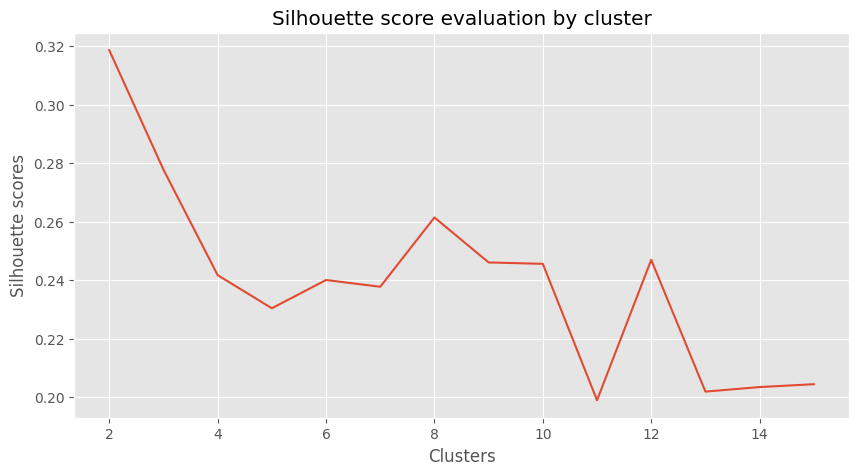

In [68]:
plt.figure(figsize = (10, 5))
plt.xlabel("Clusters")
plt.ylabel("Silhouette scores")
plt.plot(silhouette_scores["K"], silhouette_scores["scores"])
plt.title("Silhouette score evaluation by cluster")
plt.show()

##### Hierarchical clustering

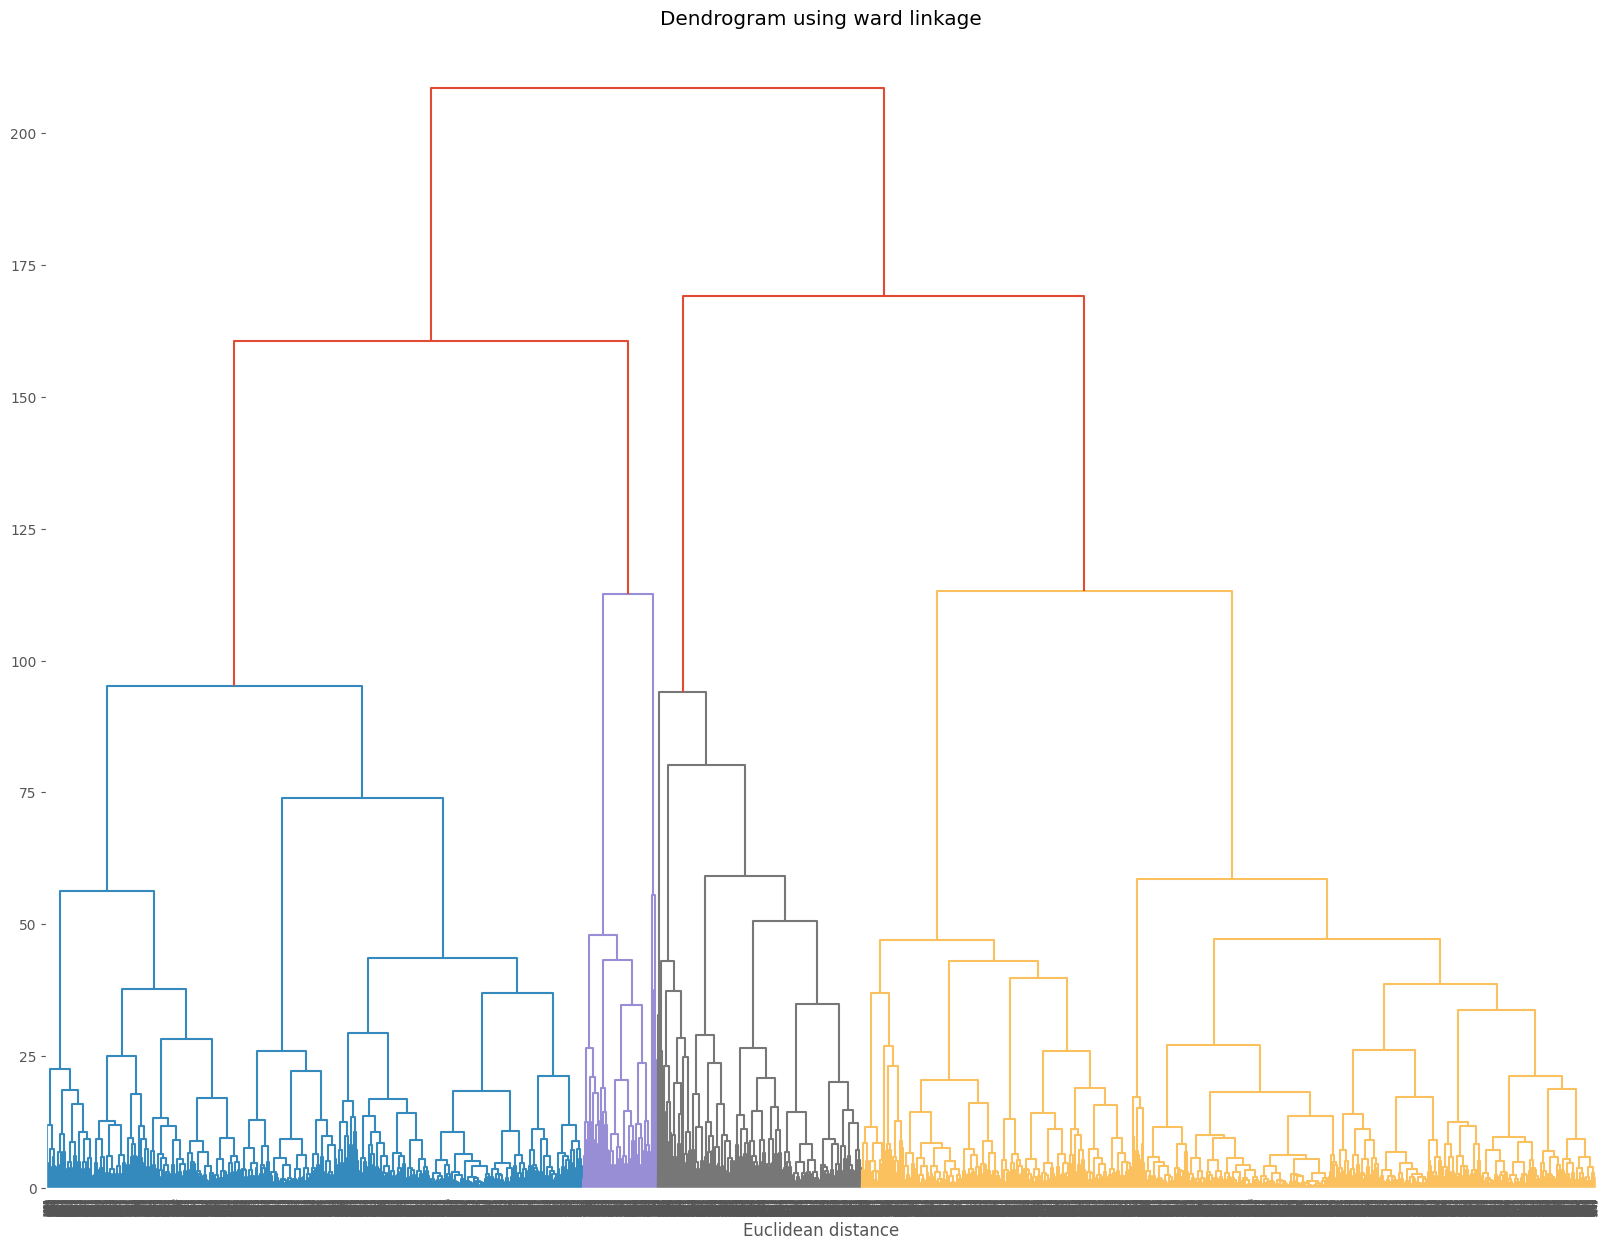

In [69]:
plt.figure(figsize = (20, 15))
dendrogram_plot = dendrogram(linkage(x_pca, method = "ward"))
plt.title("Dendrogram using ward linkage")
plt.xlabel("Cluster")
plt.xlabel("Euclidean distance")
plt.show()

In [70]:
silhouette_scores = { "K": [], "scores": [] }
for k in range(2, 11):
    params = {"n_clusters": k, "linkage": "ward"}
    clusterer = AgglomerativeClustering(**params)
    y = clusterer.fit_predict(x_pca)
    silhouette_scores["K"].append(k)
    silhouette_scores["scores"].append(silhouette_score(x_pca, y))

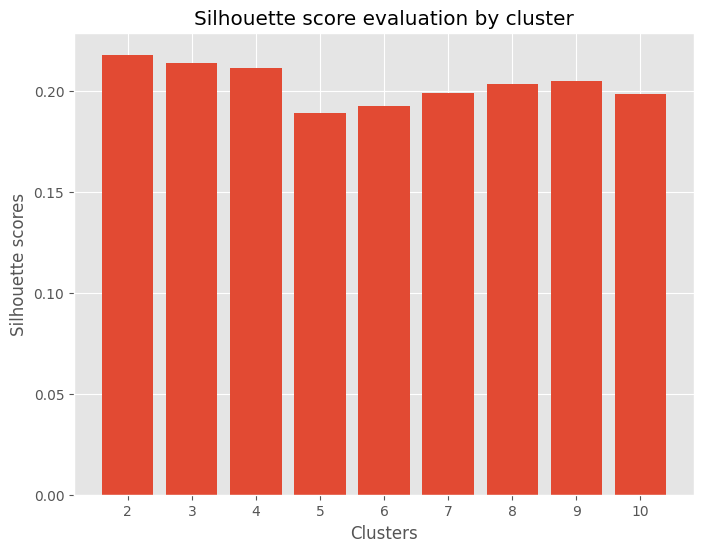

In [71]:
plt.figure(figsize = (8, 6))
plt.bar(silhouette_scores["K"], silhouette_scores["scores"])
plt.title("Silhouette score evaluation by cluster")
plt.xlabel("Clusters")
plt.ylabel("Silhouette scores")
plt.xticks(silhouette_scores["K"])
plt.show()

**Summary:**

According to PCA, the optimal number of components is 9. However, after applying clustering methods like K-Means and Hierarchical, the performance was poor. So, a reason might be this data was not suitable to PCA, which requires linearly separable datasets.

The silhouette scores show results around 0.2, which represents a poor performance telling that clusters are not well-separated (overlapping clusters). The data resulted from PCA is not the right to these clustering algorithms.

#### 3.4.2. Kernel PCA

In [72]:
kernel_pca = KernelPCA(n_components = 4, kernel = "poly")
x_kernel_pca = kernel_pca.fit_transform(x_scaled)

##### K-Means clustering

In [73]:
silhouette_scores = { "K": [], "scores": [] }
for k in range(2, 16):
    params = {"n_clusters": k, "n_init": "auto", "random_state": 42}
    kms = KMeans(**params)
    kms.fit(x_kernel_pca)
    y = kms.predict(x_kernel_pca)
    silhouette_scores["K"].append(k)
    silhouette_scores["scores"].append(silhouette_score(x_kernel_pca, y))

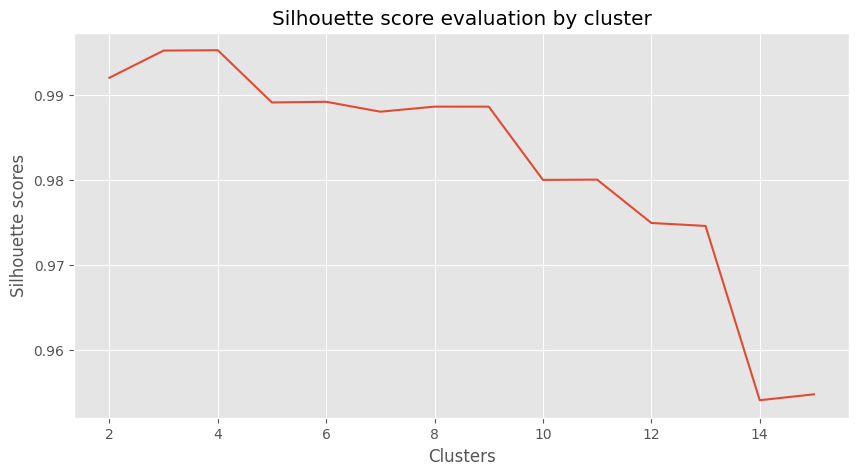

In [74]:
plt.figure(figsize = (10, 5))
plt.xlabel("Clusters")
plt.ylabel("Silhouette scores")
plt.plot(silhouette_scores["K"], silhouette_scores["scores"])
plt.title("Silhouette score evaluation by cluster")
plt.show()

##### Hierarchical clustering

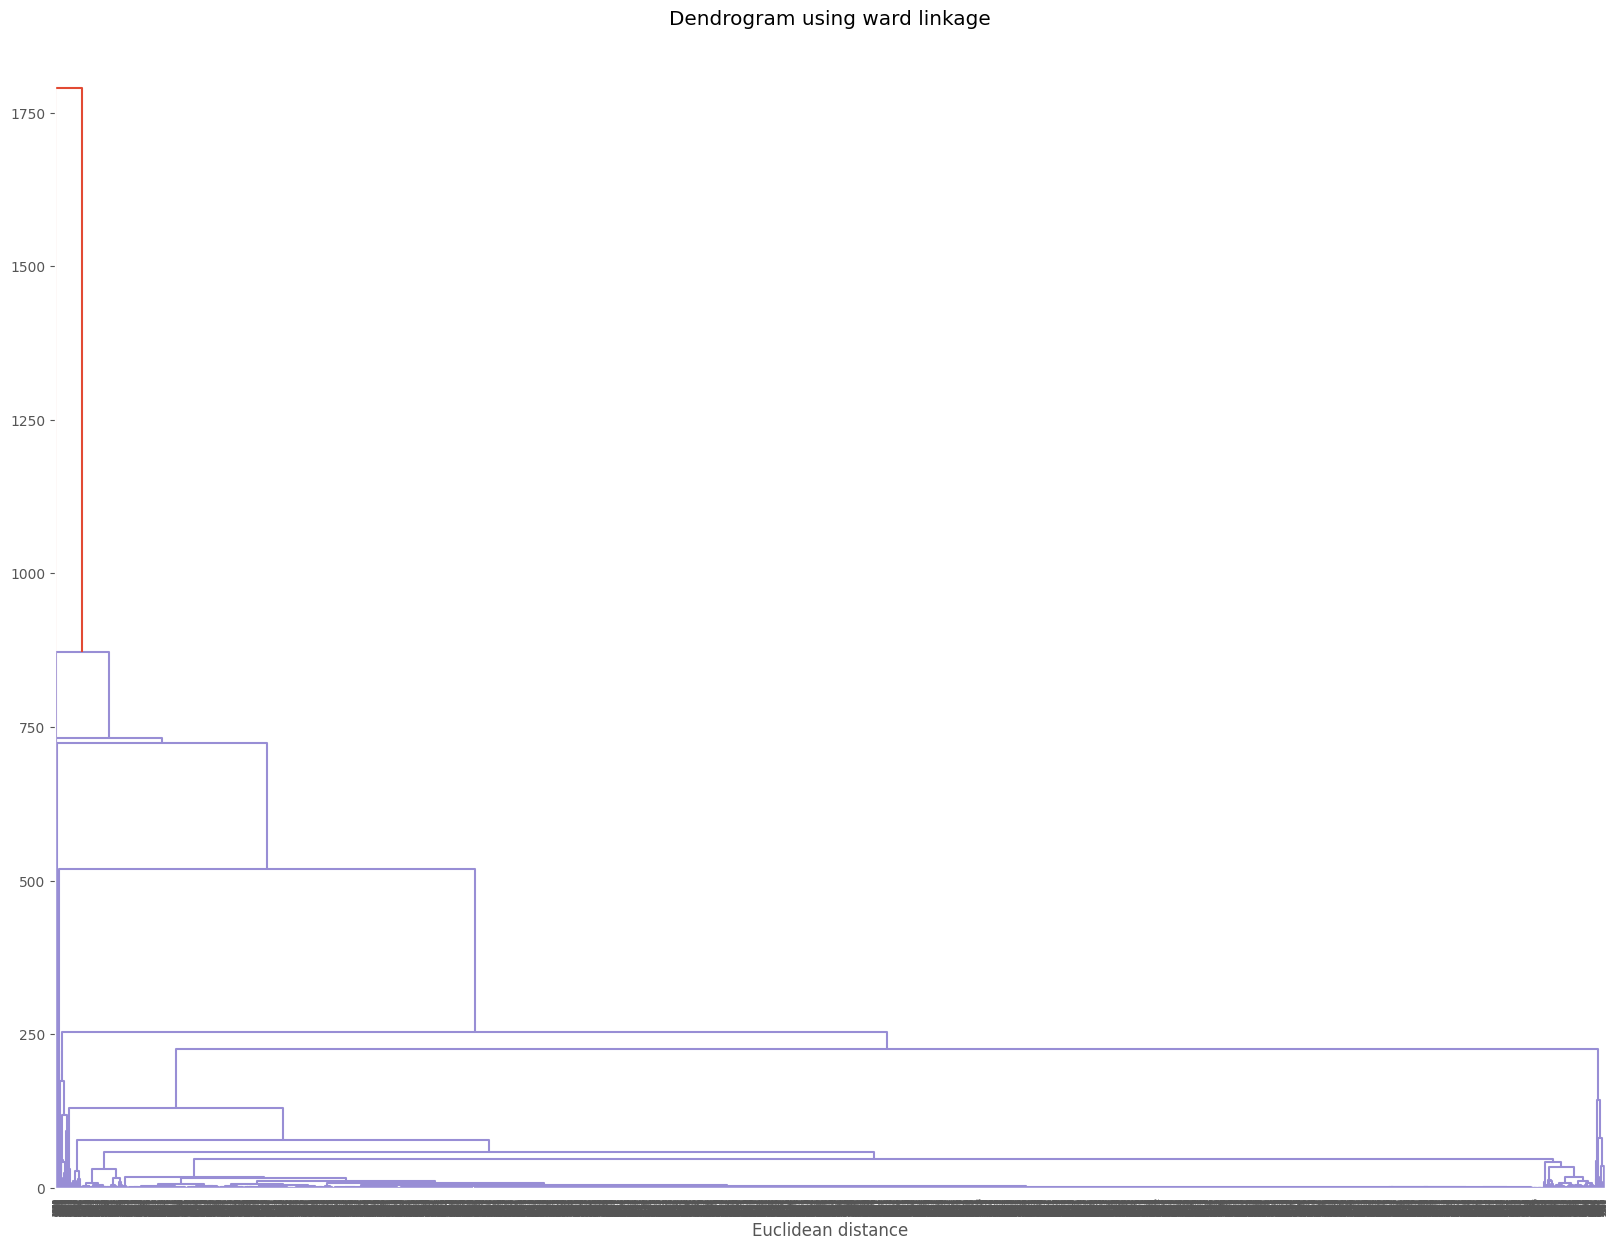

In [75]:
plt.figure(figsize = (20, 15))
dendrogram_plot = dendrogram(linkage(x_kernel_pca, method = "ward"))
plt.title("Dendrogram using ward linkage")
plt.xlabel("Cluster")
plt.xlabel("Euclidean distance")
plt.show()

In [76]:
silhouette_scores = { "K": [], "scores": [] }
for k in range(2, 11):
    params = {"n_clusters": k, "linkage": "ward"}
    clusterer = AgglomerativeClustering(**params)
    y = clusterer.fit_predict(x_kernel_pca)
    silhouette_scores["K"].append(k)
    silhouette_scores["scores"].append(silhouette_score(x_kernel_pca, y))

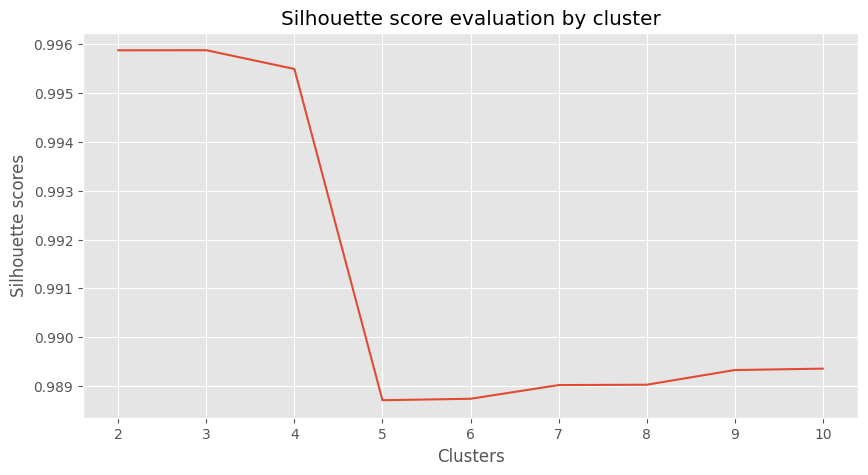

In [77]:
plt.figure(figsize = (10, 5))
plt.xlabel("Clusters")
plt.ylabel("Silhouette scores")
plt.plot(silhouette_scores["K"], silhouette_scores["scores"])
plt.title("Silhouette score evaluation by cluster")
plt.show()

**Summary:**

With Kernel PCA, it was possible to produce data linearly separable with 4 components capable to get good results from clustering methods like K-Means and Hierarchical, where the optimal number of clusters is 4.

The silhouette scores show results close to 1, which means that clusters are well-separated (not overlapping).

## 4. Data preparation

The goal of this step is to produce data for training process, by merging the results of dimensionality reduction applied to numeric variables and transforming categorical features.

### 4.1. Categorical variables

In [78]:
from sklearn.preprocessing import OneHotEncoder

In [79]:
onehot_encoder = OneHotEncoder(sparse_output = False, drop = "first")
encoded_features = onehot_encoder.fit_transform(df[categorical_features])
df_one_hot_encoder = pd.DataFrame(encoded_features, columns = onehot_encoder.get_feature_names_out())

### 4.2. Get transformed dataset

In [80]:
df_numeric_pca = pd.DataFrame(x_kernel_pca, columns = ["C0", "C1", "C2", "C3"])

In [81]:
df_train = pd.concat([df_numeric_pca, df_one_hot_encoder], axis = 1)
print("Shape:", df_train.shape)
df_train.head()

Shape: (8950, 10)


,C0,C1,C2,C3,TENURE_7,TENURE_8,TENURE_9,TENURE_10,TENURE_11,TENURE_12
0,-0.783299,-0.265717,-0.196244,-0.337475,0.0,0.0,0.0,0.0,0.0,1.0
1,-0.776182,-0.258412,-0.224868,0.122621,0.0,0.0,0.0,0.0,0.0,1.0
2,-0.772174,-0.263752,-0.191454,-0.331670,0.0,0.0,0.0,0.0,0.0,1.0
3,-0.775010,-0.264823,-0.197987,-0.331015,0.0,0.0,0.0,0.0,0.0,1.0
4,-0.781887,-0.265237,-0.197277,-0.334917,0.0,0.0,0.0,0.0,0.0,1.0


## 5. Modeling

Due to the data is a mix of categorical and continuos numeric data, it is necessary to choose the right algorithms to tackle this type of data. Algorithms like K-Means and Hierarchical Clustering rely on numerical values and the **concept of magnitude to calculate distances** like: Euclidean distance. These concepts are not part of categorical variables, so algorithms like K-prototype are a better option.

In [82]:
import mlflow

Set up directory to store all MLFlow artifacts

Open tracking on Web browser from directory `mlflow ui --backend-store-uri mlflow_tracking`

Open tracking on Web browser from sqlite `mlflow ui --backend-store-uri sqlite:///mlflow_tracking.db`

In [83]:
# mlflow.set_tracking_uri("mlflow_tracking")
mlflow.set_tracking_uri("sqlite:///mlflow_tracking.db")

Set up MLFlow experiment

In [84]:
mlflow.set_experiment("market_segmentation_insurance")

2025/06/30 17:00:26 INFO mlflow.store.db.utils: Creating initial MLflow database tables...
2025/06/30 17:00:27 INFO mlflow.store.db.utils: Updating database tables
INFO  [alembic.runtime.migration] Context impl SQLiteImpl.
INFO  [alembic.runtime.migration] Will assume non-transactional DDL.
INFO  [alembic.runtime.migration] Running upgrade  -> 451aebb31d03, add metric step
INFO  [alembic.runtime.migration] Running upgrade 451aebb31d03 -> 90e64c465722, migrate user column to tags
INFO  [alembic.runtime.migration] Running upgrade 90e64c465722 -> 181f10493468, allow nulls for metric values
INFO  [alembic.runtime.migration] Running upgrade 181f10493468 -> df50e92ffc5e, Add Experiment Tags Table
INFO  [alembic.runtime.migration] Running upgrade df50e92ffc5e -> 7ac759974ad8, Update run tags with larger limit
INFO  [alembic.runtime.migration] Running upgrade 7ac759974ad8 -> 89d4b8295536, create latest metrics table
INFO  [89d4b8295536_create_latest_metrics_table_py] Migration complete!
INFO  

<Experiment: artifact_location='file:///d:/GITHUB/ml_notebooks/unsupervised/tabular/market_segmentation_insurance/mlruns/1', creation_time=1751317236882, experiment_id='1', last_update_time=1751317236882, lifecycle_stage='active', name='market_segmentation_insurance', tags={}>

Get training features

In [85]:
x_train = df_train.values

### 5.1. K-Prototypes

This algorithm is designed to work with numeric and categorical data.

In [86]:
from kmodes.kprototypes import KPrototypes
from mlflow.models import infer_signature

Finding the optimal number of cluster

In [87]:
elbow_result = { "K": [], "Cost": [] }
silhouette_scores = { "K": [], "scores": [] }
artifact_path = "kmodes-KPrototypes-model"
model_name = "market-segmentation-insurance-model"

for k in range(2, 10):
    # Define hyperparameters
    params = {"n_clusters": k, "init": "Cao", "random_state": 42}

    with mlflow.start_run(run_name = f"K-Prototypes_cluster_{k}"):
        # Log parameters
        mlflow.log_params(params)

        kproto = KPrototypes(**params)
        y = kproto.fit_predict(x_train, categorical = [4, 5, 6, 7, 8, 9])
        elbow_result["K"].append(k)
        elbow_result["Cost"].append(kproto.cost_)

        silhouette_scores["K"].append(k)
        silhouette_scores["scores"].append(silhouette_score(x_train, y))

        # Log metrics
        mlflow.log_metric("Cost", kproto.cost_)
        mlflow.log_metric("silhouette_score", silhouette_score(x_train, y))

        # Log model
        mlflow.sklearn.log_model(
            sk_model = kproto, 
            artifact_path = artifact_path,
            signature = infer_signature(x_train),
            registered_model_name = "market-segmentation-insurance-model")

Successfully registered model 'market-segmentation-insurance-model'.
Created version '1' of model 'market-segmentation-insurance-model'.
Registered model 'market-segmentation-insurance-model' already exists. Creating a new version of this model...
Created version '2' of model 'market-segmentation-insurance-model'.
Registered model 'market-segmentation-insurance-model' already exists. Creating a new version of this model...
Created version '3' of model 'market-segmentation-insurance-model'.
Registered model 'market-segmentation-insurance-model' already exists. Creating a new version of this model...
Created version '4' of model 'market-segmentation-insurance-model'.
Registered model 'market-segmentation-insurance-model' already exists. Creating a new version of this model...
Created version '5' of model 'market-segmentation-insurance-model'.
Registered model 'market-segmentation-insurance-model' already exists. Creating a new version of this model...
Created version '6' of model 'market

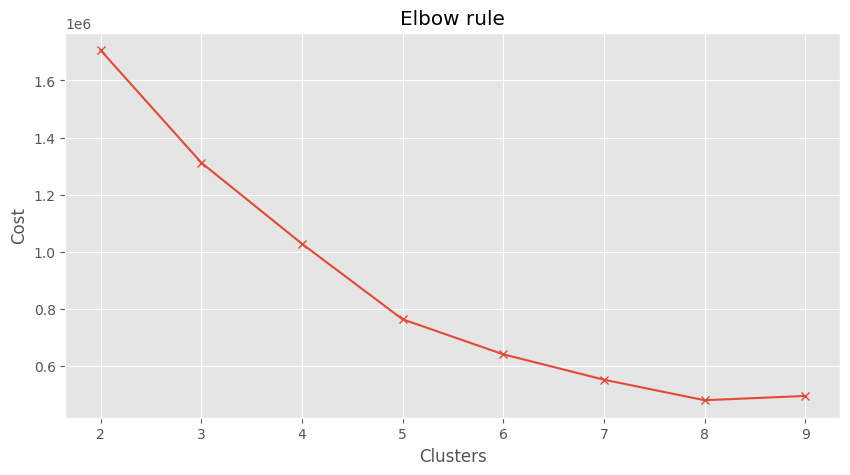

In [88]:
plt.figure(figsize = (10, 5))
plt.xlabel("Clusters")
plt.ylabel("Cost")
plt.plot(elbow_result["K"], elbow_result["Cost"], "x-")
plt.title("Elbow rule")
plt.show()

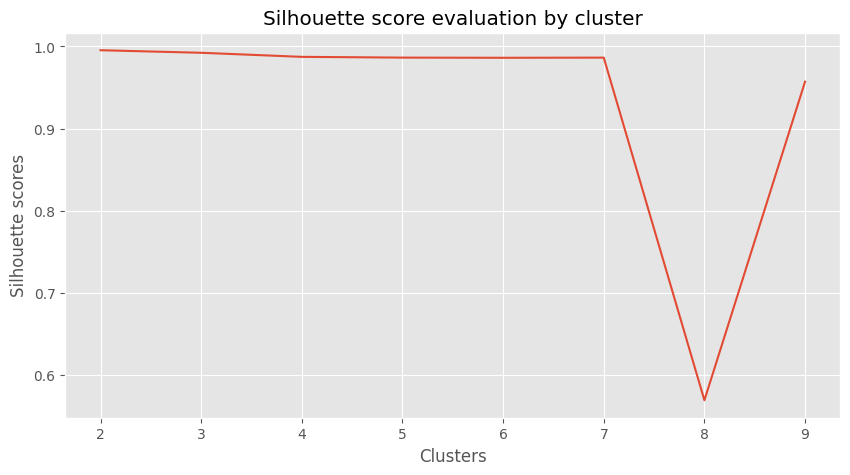

In [89]:
plt.figure(figsize = (10, 5))
plt.xlabel("Clusters")
plt.ylabel("Silhouette scores")
plt.plot(silhouette_scores["K"], silhouette_scores["scores"])
plt.title("Silhouette score evaluation by cluster")
plt.show()

**Summary:**

After several iterations, K-Prototypes is showing good results working with both numerical and categorical data, and the best number of clusters is between 2 and 7. 

## 6. Inference

In [90]:
from mlflow.tracking import MlflowClient

In [91]:
tracking_uri = "sqlite:///mlflow_tracking.db"

In [92]:
mlflow_client = MlflowClient(tracking_uri = tracking_uri)

Identifying the best model

In [99]:
model_info = mlflow_client.get_model_version_by_alias(model_name, "best_model")
print(f"Validation status: {model_info.tags['validation_status']}")
print(f"Stage: {model_info.tags['stage']}")
print(f"Number clusters: {model_info.tags['number_clusters']}")

Validation status: done
Stage: production
Number clusters: 3


In [ ]:
model_info

'3769867aace340c8929054f88c6025ab'

Retrieving the best model

In [ ]:
model = mlflow.sklearn.load_model(f"models:/{model_name}@best_model")
print(model)

KPrototypes(gamma=np.float64(4.4155767933967995), n_clusters=3, random_state=42)


## References

https://machinelearningmastery.com/skewness-be-gone-transformative-tricks-for-data-scientists/

https://www.datacamp.com/tutorial/tutorial-datails-on-correlation